In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
##import pandas_profiling
import folium
import webbrowser
from PIL import Image
#pandas_profiling.ProfileReport(USA_Housing)

In [7]:
## Import Directory

In [2]:
link="D:/ml python/crimes-in-chicago/"
dirlist=os.listdir(link)
print(dirlist)

['Chicago2001-2004-1.csv', 'Chicago2001-2004.csv', 'Chicago2005-2007.csv', 'Chicago2008-2011.csv', 'Chicago2012-2017.csv', 'corr.csv', 'Crimes_-_2001_to_present.csv', 'des.csv', 'des1.csv', 'des2.csv', 'des3.csv', 'Fig', 'Profiling.docx']


## Import Data

In [3]:
c0104=pd.read_csv(link+dirlist[1])
c0507=pd.read_csv(link+dirlist[2])
c0811=pd.read_csv(link+dirlist[3])
c1217=pd.read_csv(link+dirlist[4])
c1719=pd.read_csv(link+dirlist[6])

In [4]:
c0104.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

## Creating Data Profile

In [11]:
#pandas_profiling.ProfileReport(c0104)

In [12]:
#pandas_profiling.ProfileReport(c0507)

In [13]:
#pandas_profiling.ProfileReport(c0811)

In [14]:
#pandas_profiling.ProfileReport(c1217)

## Data Cleaning

In [5]:
c0811.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10-07-2008 12:39,000XX E 75TH ST,110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10-09-2008 03:30,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10-09-2008 08:35,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10-10-2008 02:33,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10-10-2008 12:50,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [6]:

c0104smooth=c0104.dropna(axis=1)
c0104smooth.isna().sum()
c0104smooth=c0104smooth[1:]
print(len(c0104smooth))
c0104.describe().to_csv(link+"des.csv")

1048574


In [7]:
c0507smooth=c0507.dropna(axis=1)
c0507smooth.isna().sum()
c0507smooth=c0507smooth[1:]
print(len(c0507smooth))
c0507.describe().to_csv(link+"des1.csv")

1048574


In [8]:
c0811smooth=c0811.dropna(axis=1)
c0811smooth.isna().sum()
c0811smooth=c0811smooth[1:]
print(len(c0811smooth))
c0811.describe().to_csv(link+"des2.csv")
c0811smooth.head()

1048574


,Unnamed: 0,ID,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,835,4786,10-09-2008 03:30,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,True,False,1533,01A,2008,08/17/2015 03:03:40 PM
2,1334,4787,10-09-2008 08:35,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,False,False,831,01A,2008,08/17/2015 03:03:40 PM
3,1907,4788,10-10-2008 02:33,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,False,1524,01A,2008,08/17/2015 03:03:40 PM
4,2436,4789,10-10-2008 12:50,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,True,1032,01A,2008,08/17/2015 03:03:40 PM
5,3056,4790,10-10-2008 20:32,015XX W 14TH ST,110,HOMICIDE,FIRST DEGREE MURDER,True,True,1231,01A,2008,08/17/2015 03:03:40 PM


In [9]:
c1217smooth=c1217.dropna(axis=1)
c1217smooth.isna().sum()
c1217smooth=c1217smooth[1:]
print(len(c1217smooth))
c1217.describe().to_csv(link+"des3.csv")

1048574


## Subsetting

In [10]:
c1=c0104smooth.columns.tolist()
c0104smooth=c0104smooth[c1[1:]]
c0104smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On
1,4676906,HM278933,03-01-2003 00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,935,9,26,2003,04/15/2016 08:55:02 AM
2,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,1413,14,20,2004,08/17/2015 03:03:40 PM
3,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,2521,25,6,2004,08/17/2015 03:03:40 PM
4,4677901,HM275615,05-01-2003 01:00,111XX S NORMAL AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,2233,22,6,2003,04/15/2016 08:55:02 AM
5,4838048,HM440266,08-01-2004 00:01,012XX S HARDING AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,1011,10,6,2004,08/17/2015 03:03:40 PM


In [21]:
c2=c0507smooth.columns.tolist()
c0507smooth=c0507smooth[c2[1:]]
c0507smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,321,18,2006,04/15/2016 08:55:02 AM
2,4673628,HM113861,01-08-2006 23:16,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,321,04A,2006,04/15/2016 08:55:02 AM
3,4673629,HM274049,04-05-2006 18:45,061XX W NEWPORT AVE,460,BATTERY,SIMPLE,False,False,1633,08B,2006,04/15/2016 08:55:02 AM
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,822,18,2006,04/15/2016 08:55:02 AM
5,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,560,ASSAULT,SIMPLE,True,False,734,08A,2006,04/15/2016 08:55:02 AM


In [11]:
c3=c0811smooth.columns.tolist()
c0811smooth=c0811smooth[c3[1:]]
c0811smooth.head()

,ID,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,4786,10-09-2008 03:30,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,True,False,1533,01A,2008,08/17/2015 03:03:40 PM
2,4787,10-09-2008 08:35,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,False,False,831,01A,2008,08/17/2015 03:03:40 PM
3,4788,10-10-2008 02:33,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,False,1524,01A,2008,08/17/2015 03:03:40 PM
4,4789,10-10-2008 12:50,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,True,1032,01A,2008,08/17/2015 03:03:40 PM
5,4790,10-10-2008 20:32,015XX W 14TH ST,110,HOMICIDE,FIRST DEGREE MURDER,True,True,1231,01A,2008,08/17/2015 03:03:40 PM


In [12]:
c4=c1217smooth.columns.tolist()
c1217smooth=c1217smooth[c4[1:]]
c1217smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,313,08B,2016,05-10-2016 15:56
2,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False,False,1524,24,2016,05-10-2016 15:56
3,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,False,False,1532,08B,2016,05-10-2016 15:56
4,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,False,True,1523,6,2016,05-10-2016 15:56
5,10508702,HZ250447,05-03-2016 22:35,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,631,04B,2016,05-10-2016 15:56


## Primary Analysis

In [13]:
c0104arr=np.array(c0104smooth['Primary Type'])
c0104u=np.unique(c0104arr)

In [14]:
c0104key=np.unique(np.array(np.array(c0104smooth['Primary Type'])))
c0104val=np.array(c0104smooth['Primary Type'].value_counts().values)
print(c0104u[:8])
print(c0104val[:8])

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[212361 201429 120182 111094  68164  67525  56454  55793]


<BarContainer object of 8 artists>

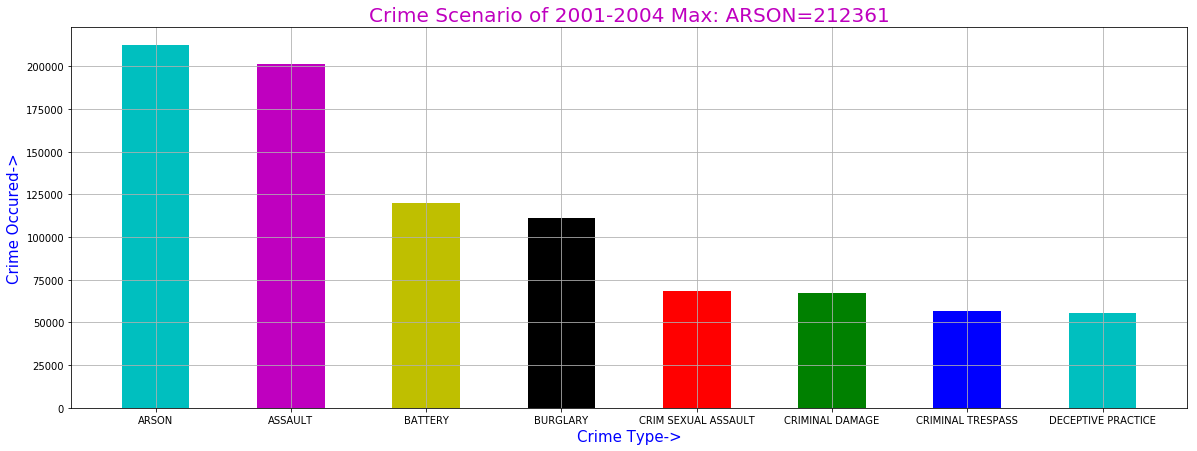

In [15]:
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001-2004 Max: {}={}".format(c0104u[:8][0],c0104val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0104u[:8],c0104val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[197319 190674 142127 129549  63624  61549  56481  47448]


<BarContainer object of 8 artists>

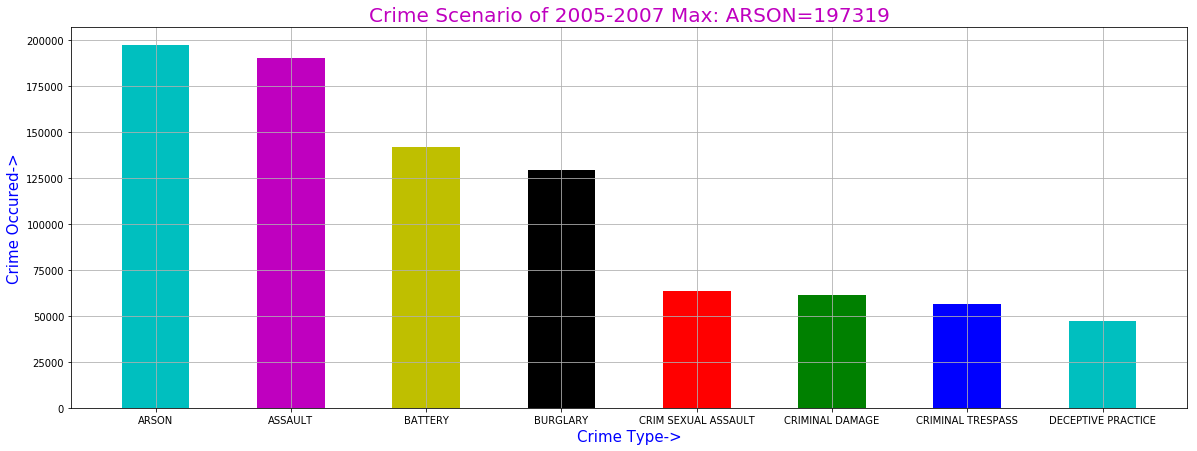

In [16]:
c0507arr=np.array(c0507smooth['Primary Type'])
c0507u=np.unique(c0507arr)
c0507key=np.unique(np.array(np.array(c0507smooth['Primary Type'])))
c0507val=np.array(c0507smooth['Primary Type'].value_counts().values)
print(c0507u[:8])
print(c0507val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2005-2007 Max: {}={}".format(c0507u[:8][0],c0507val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0507u[:8],c0507val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[215423 186928 126189 118093  68323  66172  62223  45189]


<BarContainer object of 8 artists>

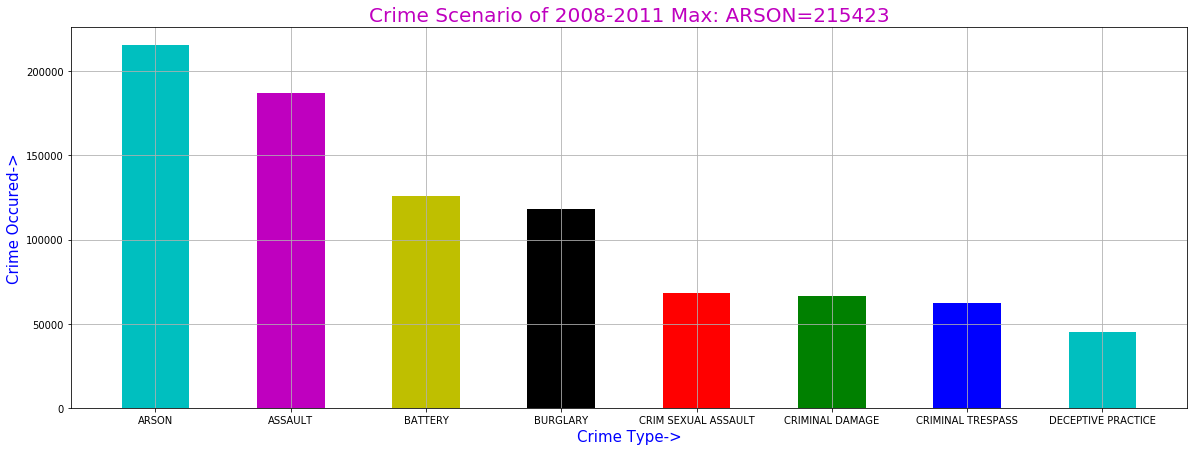

In [17]:
c0811arr=np.array(c0811smooth['Primary Type'])
c0811u=np.unique(c0811arr)
c0811key=np.unique(np.array(np.array(c0811smooth['Primary Type'])))
c0811val=np.array(c0811smooth['Primary Type'].value_counts().values)
print(c0811u[:8])
print(c0811val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2008-2011 Max: {}={}".format(c0811u[:8][0],c0811val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0811u[:8],c0811val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[236724 188825 110781 109031  64049  61711  61458  48697]


<BarContainer object of 8 artists>

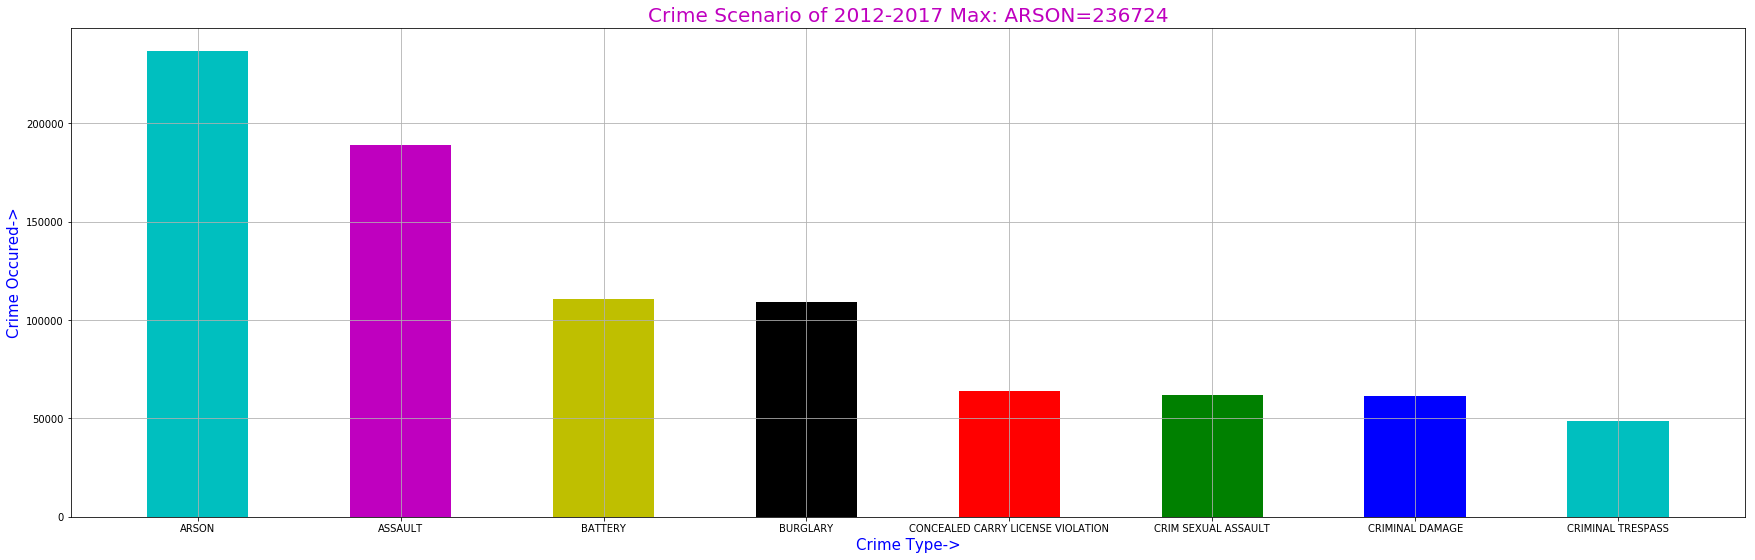

In [18]:
c1217arr=np.array(c1217smooth['Primary Type'])
c1217u=np.unique(c1217arr)
c1217key=np.unique(np.array(np.array(c1217smooth['Primary Type'])))
c1217val=np.array(c1217smooth['Primary Type'].value_counts().values)
print(c1217u[:8])
print(c1217val[:8])
color='cmykrgb'
plt.figure(figsize=(30,9))
plt.title("Crime Scenario of 2012-2017 Max: {}={}".format(c1217u[:8][0],c1217val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c1217u[:8],c1217val[:8],color=color,width=0.5)

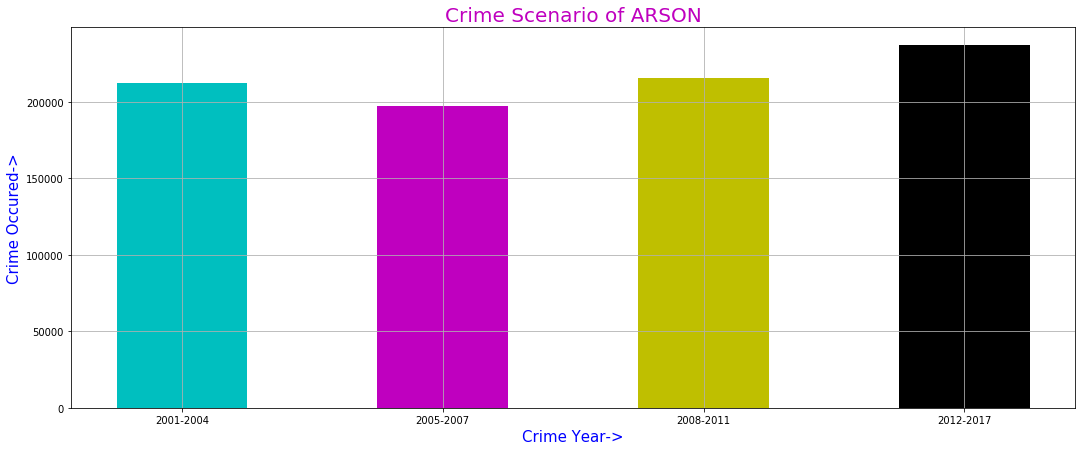

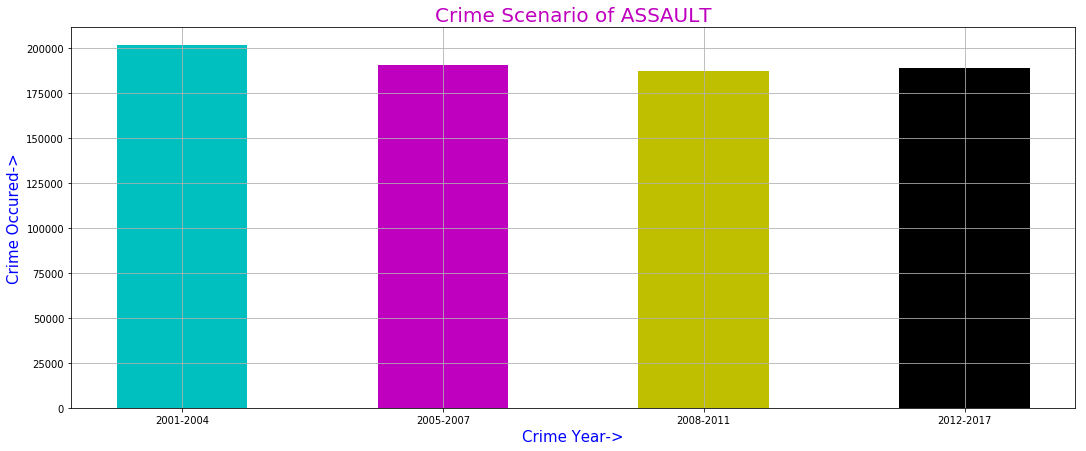

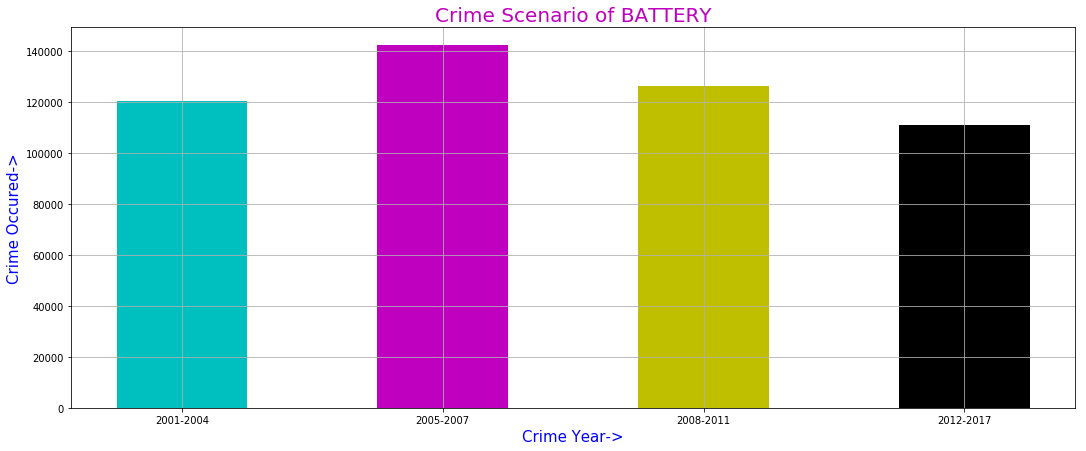

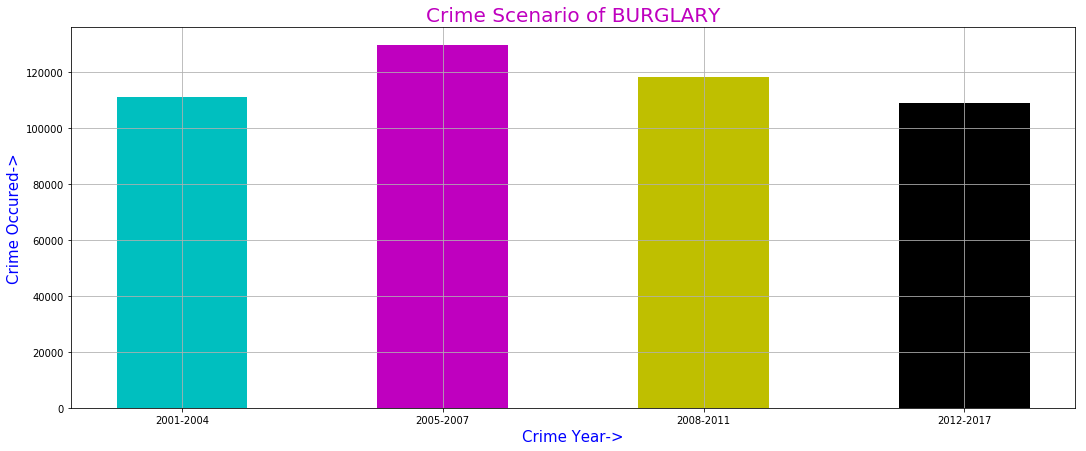

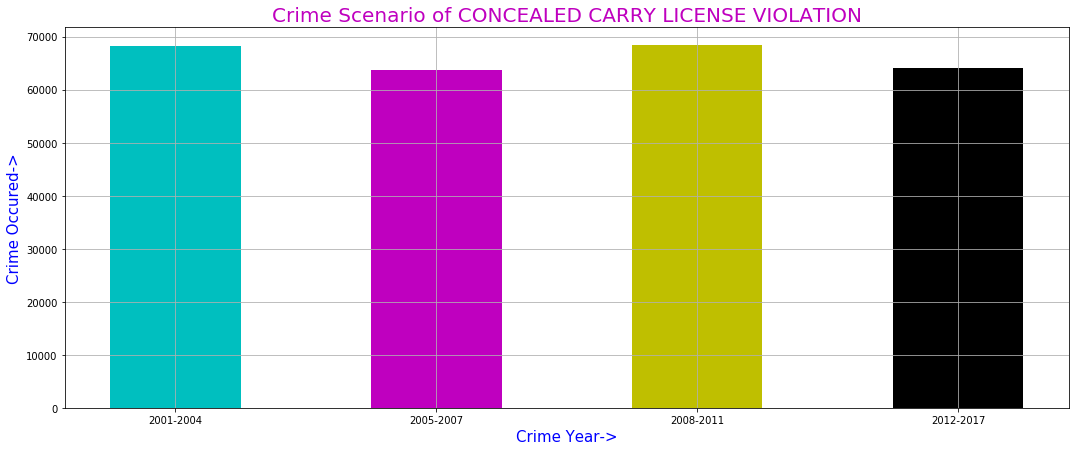

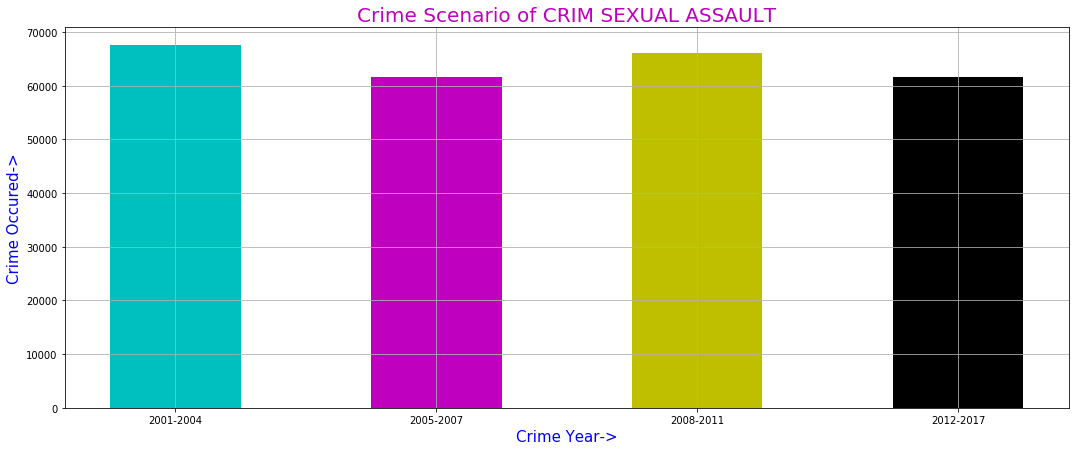

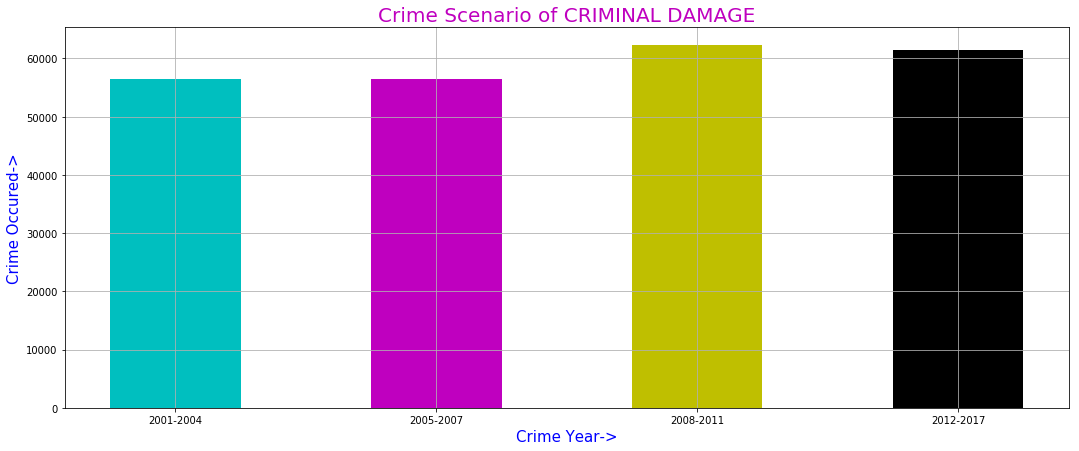

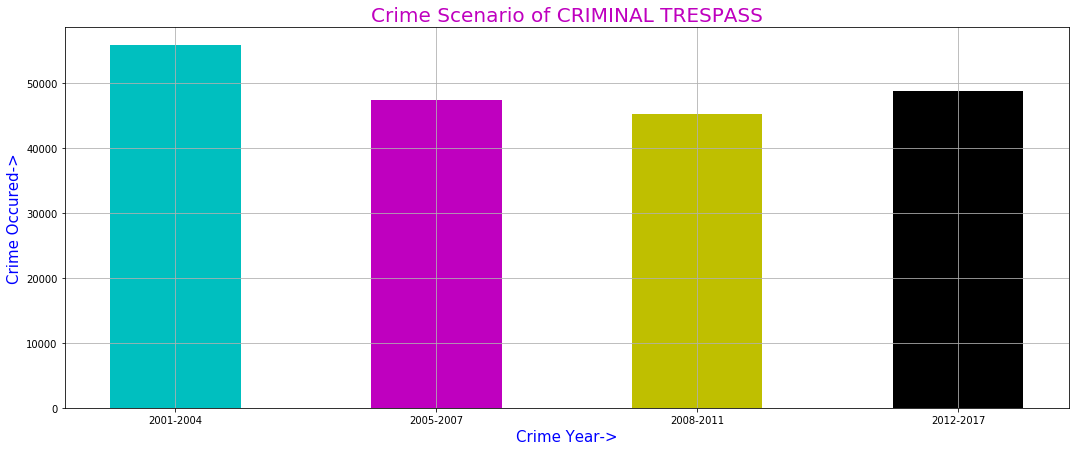

In [19]:
for i in range(len(c0104val[:8])):
    val=[c0104val[:8][i],c0507val[:8][i],c0811val[:8][i],c1217val[:8][i]]
    year=['2001-2004','2005-2007','2008-2011','2012-2017']
    color='cmykrgb'
    plt.figure(figsize=(18,7))
    plt.title("Crime Scenario of {}".format(c1217u[:8][i]),fontsize=20,color='m')
    plt.xlabel("Crime Year->",fontsize=15,color='b')
    plt.ylabel("Crime Occured->",fontsize=15,color='b')
    plt.grid()
    plt.bar(year,val,color=color,width=0.5)
    plt.savefig("D:/ml python/crimes-in-chicago/Fig1/"+c1217u[:8][i])

### 2001

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[98761 93443 55843 50564 31382 29627 27545 26008]


<BarContainer object of 8 artists>

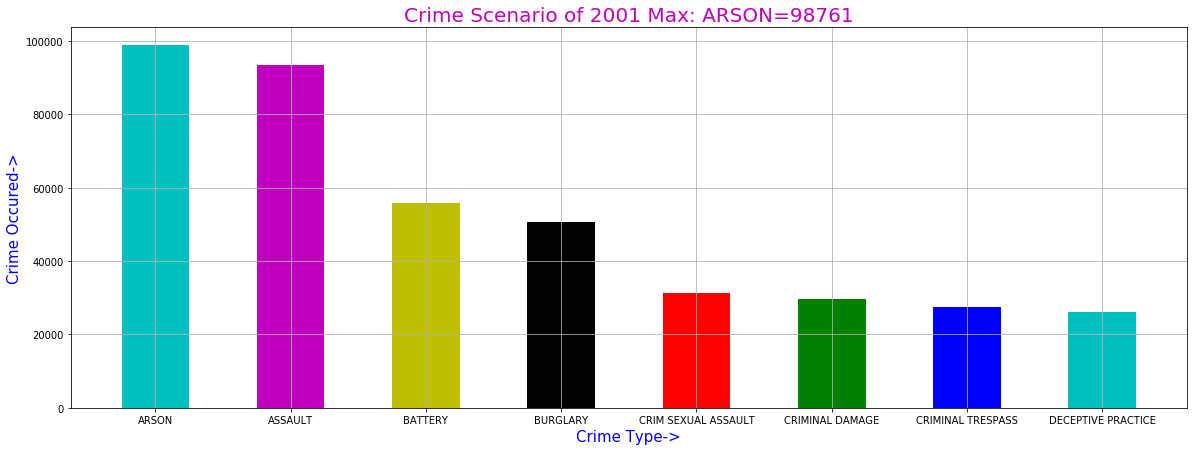

In [20]:
c01=c0104smooth[c0104smooth['Year']==2001]
c01=c01[c01.columns.tolist()[1:]]
c01.head()
c01arr=np.array(c01['Primary Type'])
c01u=np.unique(c01arr)
c01key=np.unique(np.array(np.array(c01['Primary Type'])))
c01val=np.array(c01['Primary Type'].value_counts().values)
print(c01u[:8])
print(c01val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c01u[:8][0],c01val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c01u[:8],c01val[:8],color=color,width=0.5)

### 2002

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[97135 94081 55890 51568 32403 31494 25604 25084]


<BarContainer object of 8 artists>

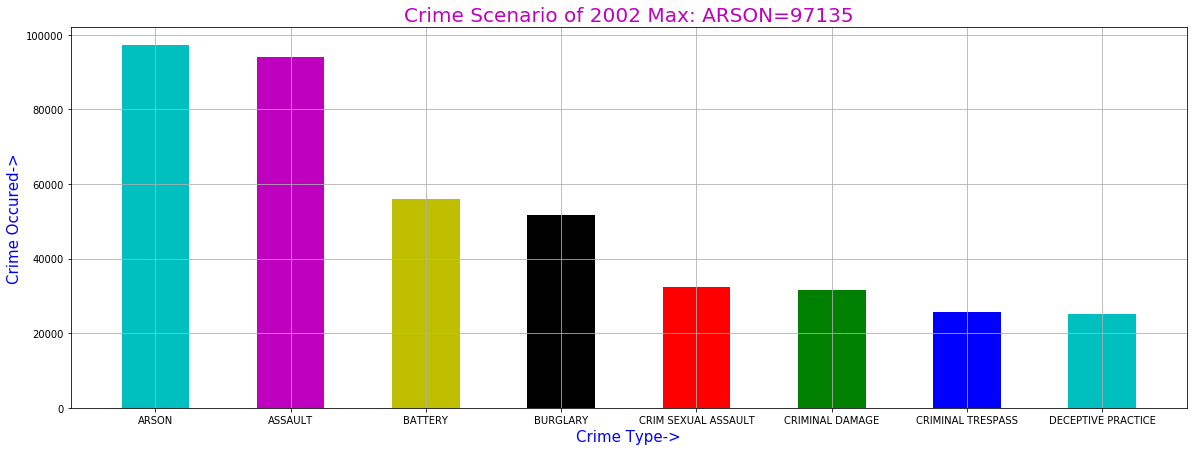

In [21]:
c02=c0104smooth[c0104smooth['Year']==2002]
c02=c02[c02.columns.tolist()[1:]]
c02.head()
c02arr=np.array(c01['Primary Type'])
c02u=np.unique(c02arr)
c02key=np.unique(np.array(np.array(c02['Primary Type'])))
c02val=np.array(c02['Primary Type'].value_counts().values)
print(c02u[:8])
print(c02val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2002 Max: {}={}".format(c02u[:8][0],c02val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c02u[:8],c02val[:8],color=color,width=0.5)

### 2003

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[15842 13883  8890  8438  6111  4639  4172  3802]


<BarContainer object of 8 artists>

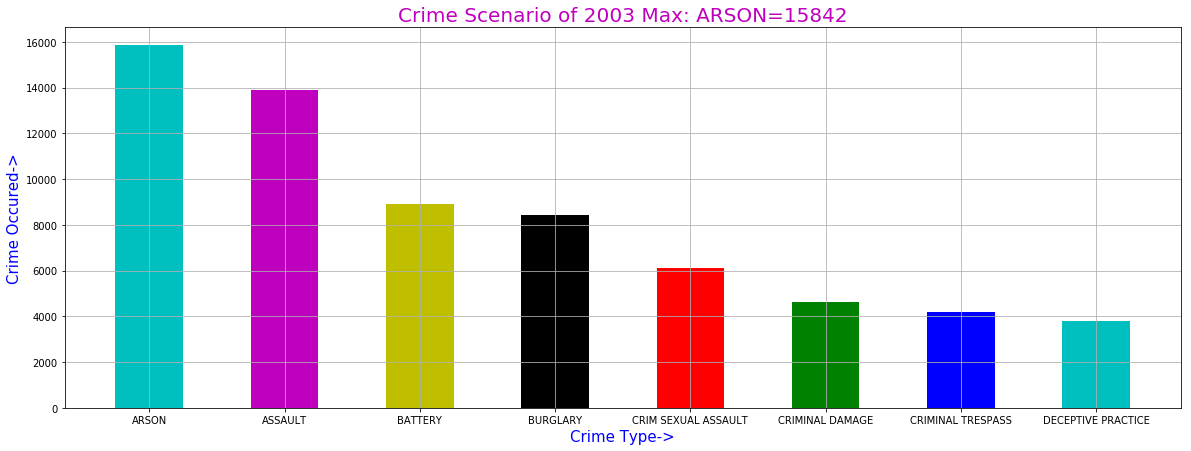

In [22]:
c03=c0104smooth[c0104smooth['Year']==2003]
c03=c03[c03.columns.tolist()[1:]]
c03.head()
c03arr=np.array(c03['Primary Type'])
c03u=np.unique(c03arr)
c03key=np.unique(np.array(np.array(c03['Primary Type'])))
c03val=np.array(c03['Primary Type'].value_counts().values)
print(c03u[:8])
print(c03val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2003 Max: {}={}".format(c03u[:8][0],c03val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c03u[:8],c03val[:8],color=color,width=0.5)

### 2004

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[623 145 145 112  88  72  71  23]


<BarContainer object of 8 artists>

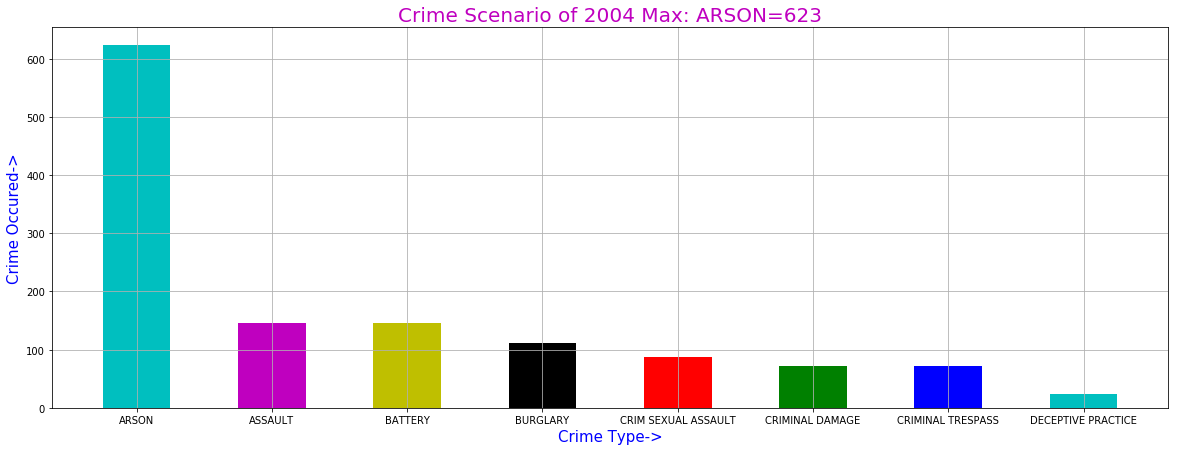

In [23]:
c04=c0104smooth[c0104smooth['Year']==2004]
c04=c04[c04.columns.tolist()[1:]]
c04.head()
c04arr=np.array(c04['Primary Type'])
c04u=np.unique(c04arr)
c04key=np.unique(np.array(np.array(c04['Primary Type'])))
c04val=np.array(c04['Primary Type'].value_counts().values)
print(c04u[:8])
print(c04val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2004 Max: {}={}".format(c04u[:8][0],c04val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c04u[:8],c04val[:8],color=color,width=0.5)



### 2005

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[1425  510  505  280  272  226  165  154]


<BarContainer object of 8 artists>

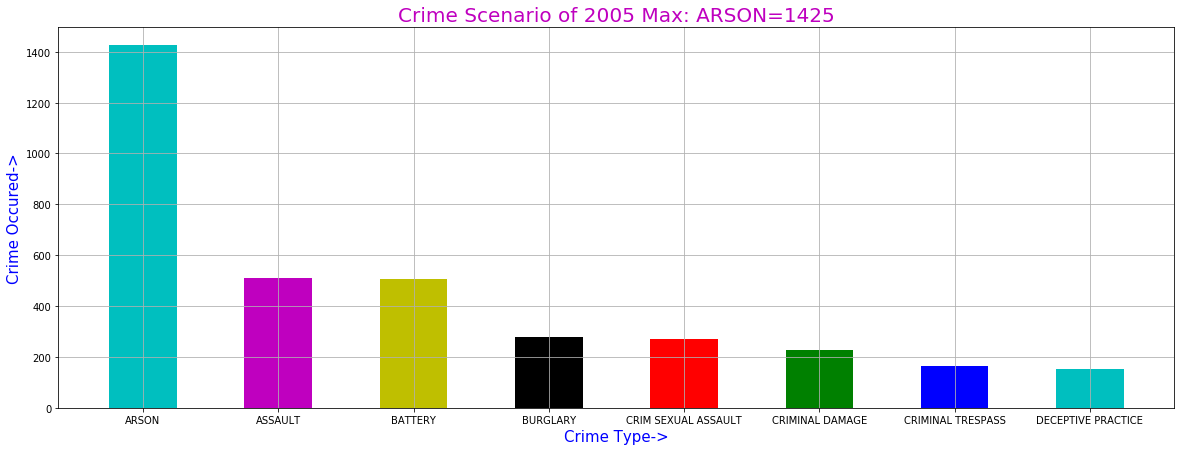

In [24]:
c05=c0507smooth[c0507smooth['Year']==2005]
c05=c05[c05.columns.tolist()[1:]]
c05.head()
c05arr=np.array(c05['Primary Type'])
c05u=np.unique(c05arr)
c05key=np.unique(np.array(np.array(c05['Primary Type'])))
c05val=np.array(c05['Primary Type'].value_counts().values)
print(c05u[:8])
print(c05val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2005 Max: {}={}".format(c05u[:8][0],c05val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c05u[:8],c05val[:8],color=color,width=0.5)

### 2006

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[132079 123369  95967  86258  40377  39584  37485  31994]


<BarContainer object of 8 artists>

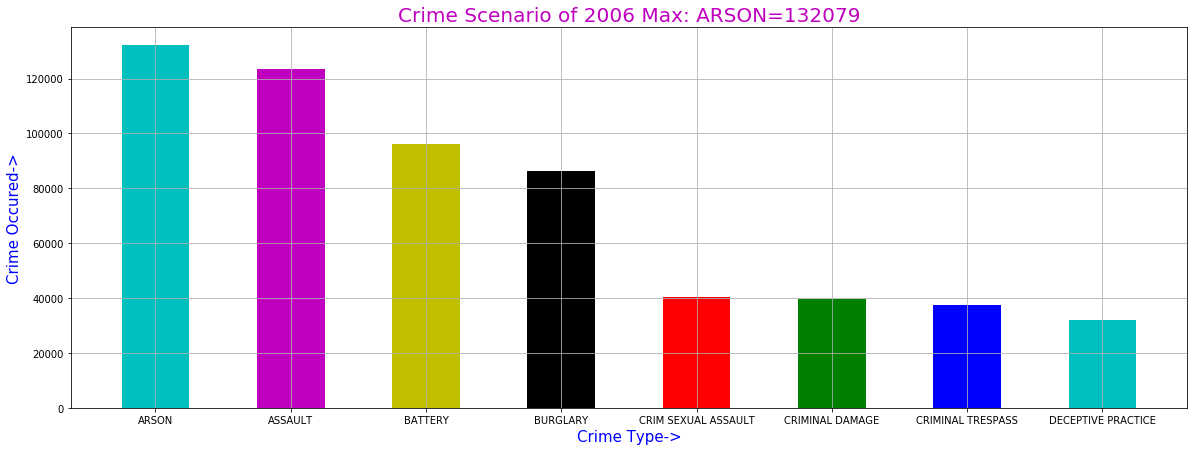

In [25]:
c06=c0507smooth[c0507smooth['Year']==2006]
c06=c06[c06.columns.tolist()[1:]]
c06.head()
c06arr=np.array(c06['Primary Type'])
c06u=np.unique(c06arr)
c06key=np.unique(np.array(np.array(c06['Primary Type'])))
c06val=np.array(c06['Primary Type'].value_counts().values)
print(c06u[:8])
print(c06val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2006 Max: {}={}".format(c06u[:8][0],c06val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c06u[:8],c06val[:8],color=color,width=0.5)

### 2007

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[66795 63815 45934 43019 22967 21821 18850 15300]


<BarContainer object of 8 artists>

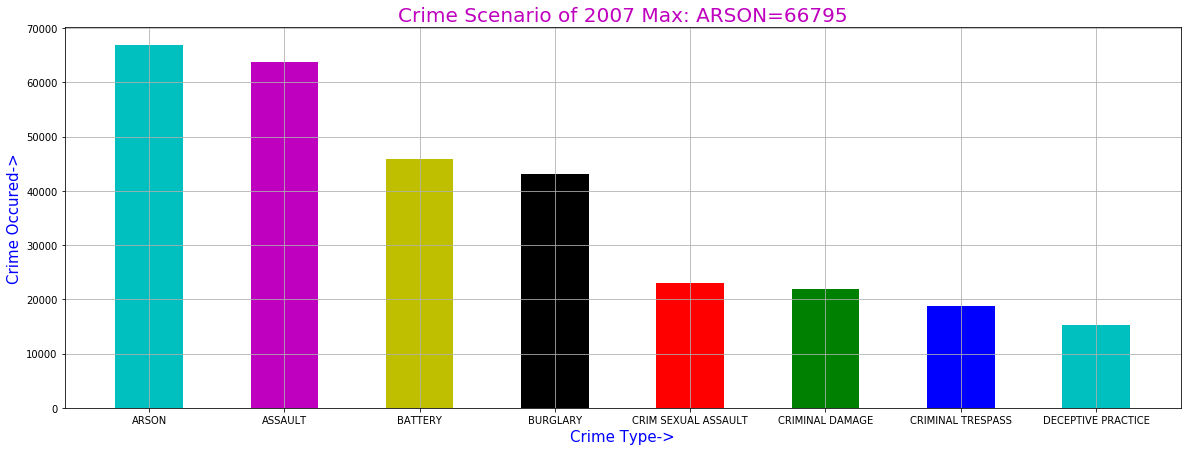

In [26]:
c07=c0507smooth[c0507smooth['Year']==2007]
c07=c07[c07.columns.tolist()[1:]]
c07.head()
c07arr=np.array(c07['Primary Type'])
c07u=np.unique(c07arr)
c07key=np.unique(np.array(np.array(c07['Primary Type'])))
c07val=np.array(c07['Primary Type'].value_counts().values)
print(c07u[:8])
print(c07val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2007 Max: {}={}".format(c07u[:8][0],c07val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c07u[:8],c07val[:8],color=color,width=0.5)

### 2008

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[88423 75917 52838 46506 26530 26213 25445 18878]


,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,10-09-2008 03:30,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,True,False,1533,01A,2008,08/17/2015 03:03:40 PM
2,10-09-2008 08:35,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,False,False,831,01A,2008,08/17/2015 03:03:40 PM
3,10-10-2008 02:33,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,False,1524,01A,2008,08/17/2015 03:03:40 PM
4,10-10-2008 12:50,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,True,1032,01A,2008,08/17/2015 03:03:40 PM
5,10-10-2008 20:32,015XX W 14TH ST,110,HOMICIDE,FIRST DEGREE MURDER,True,True,1231,01A,2008,08/17/2015 03:03:40 PM


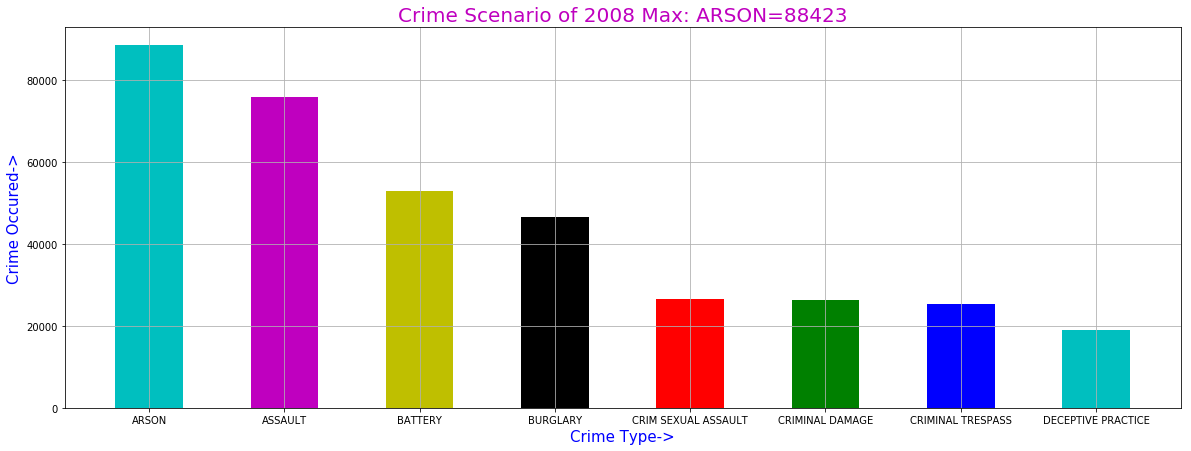

In [27]:
c08=c0811smooth[c0811smooth['Year']==2008]
c08=c08[c08.columns.tolist()[1:]]
c08.head()
c08arr=np.array(c08['Primary Type'])
c08u=np.unique(c08arr)
c08key=np.unique(np.array(np.array(c08['Primary Type'])))
c08val=np.array(c08['Primary Type'].value_counts().values)
print(c08u[:8])
print(c08val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2008 Max: {}={}".format(c08u[:8][0],c08val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c08u[:8],c08val[:8],color=color,width=0.5)
c08.head()

### 2009

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[80843 68369 47663 43452 26720 25569 22834 15952]


<BarContainer object of 8 artists>

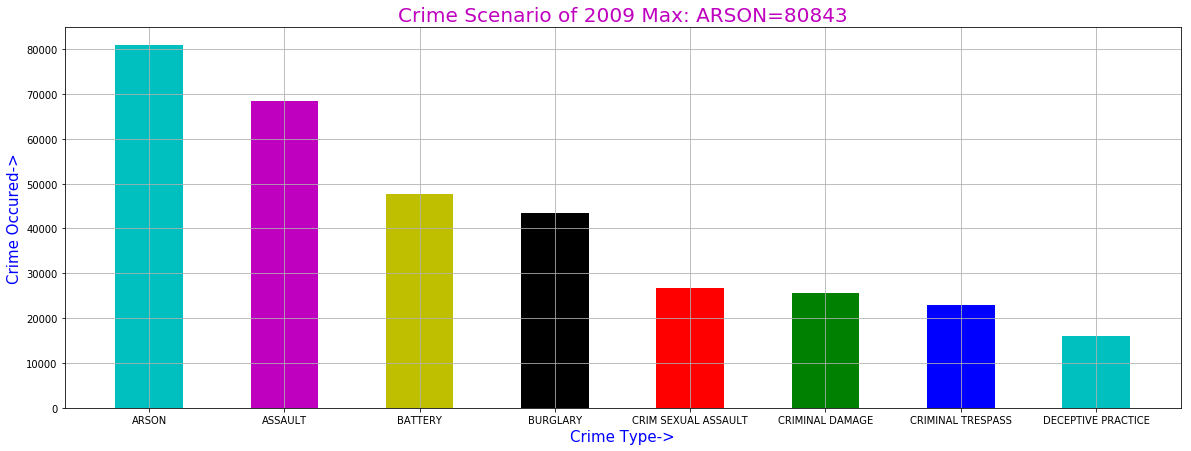

In [28]:
c09=c0811smooth[c0811smooth['Year']==2009]
c09=c09[c09.columns.tolist()[1:]]
c09.head()
c09arr=np.array(c09['Primary Type'])
c09u=np.unique(c09arr)
c09key=np.unique(np.array(np.array(c09['Primary Type'])))
c09val=np.array(c09['Primary Type'].value_counts().values)
print(c09u[:8])
print(c09val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2009 Max: {}={}".format(c09u[:8][0],c09val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c09u[:8],c09val[:8],color=color,width=0.5)

### 2010

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[46049 42557 28111 25688 15388 14062 13900 10848]


<BarContainer object of 8 artists>

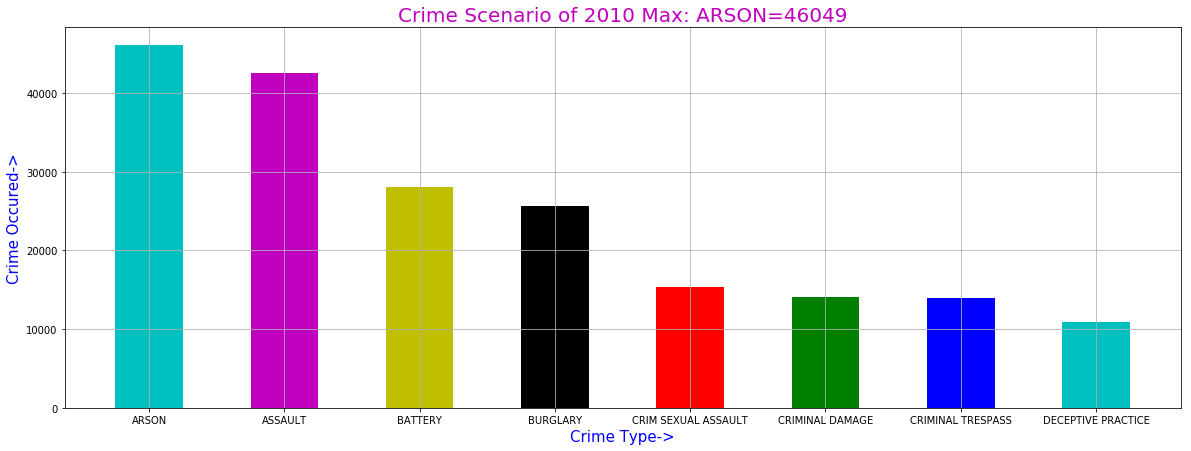

In [29]:
c10=c0811smooth[c0811smooth['Year']==2010]
c10=c10[c10.columns.tolist()[1:]]
c10.head()
c10arr=np.array(c10['Primary Type'])
c10u=np.unique(c10arr)
c10key=np.unique(np.array(np.array(c10['Primary Type'])))
c10val=np.array(c10['Primary Type'].value_counts().values)
print(c10u[:8])
print(c10val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2010 Max: {}={}".format(c10u[:8][0],c10val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c10u[:8],c10val[:8],color=color,width=0.5)

### 2011

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'DECEPTIVE PRACTICE' 'KIDNAPPING' 'MOTOR VEHICLE THEFT']
[193 108  85  44  25  24  17  12]


<BarContainer object of 8 artists>

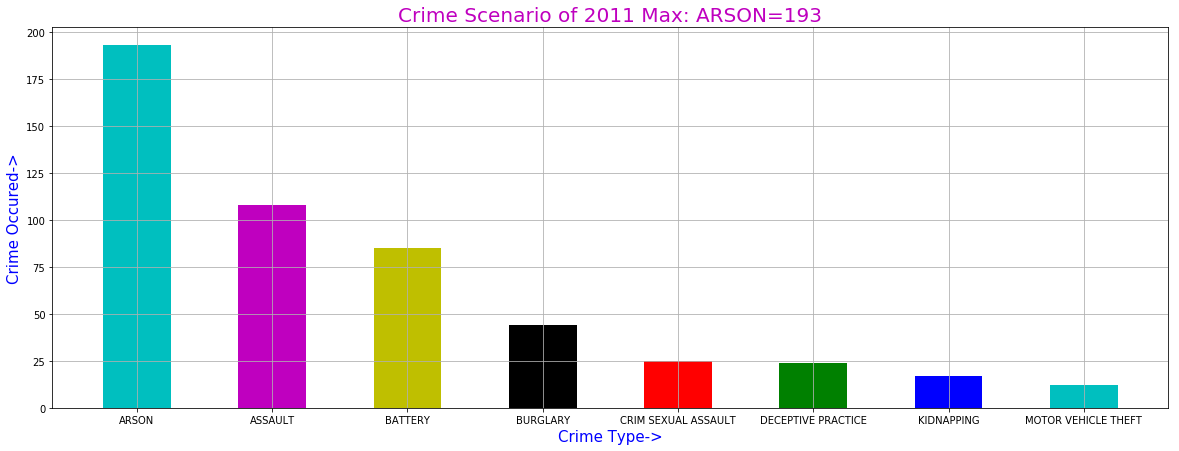

In [30]:
c11=c0811smooth[c0811smooth['Year']==2011]
c11=c11[c11.columns.tolist()[1:]]
c11.head()
c11arr=np.array(c11['Primary Type'])
c11u=np.unique(c11arr)
c11key=np.unique(np.array(np.array(c11['Primary Type'])))
c11val=np.array(c11['Primary Type'].value_counts().values)
print(c11u[:8])
print(c11val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2011 Max: {}={}".format(c11u[:8][0],c11val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c11u[:8],c11val[:8],color=color,width=0.5)

### 2012

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[75438 59125 35852 35379 22836 19896 17472 16486]


<BarContainer object of 8 artists>

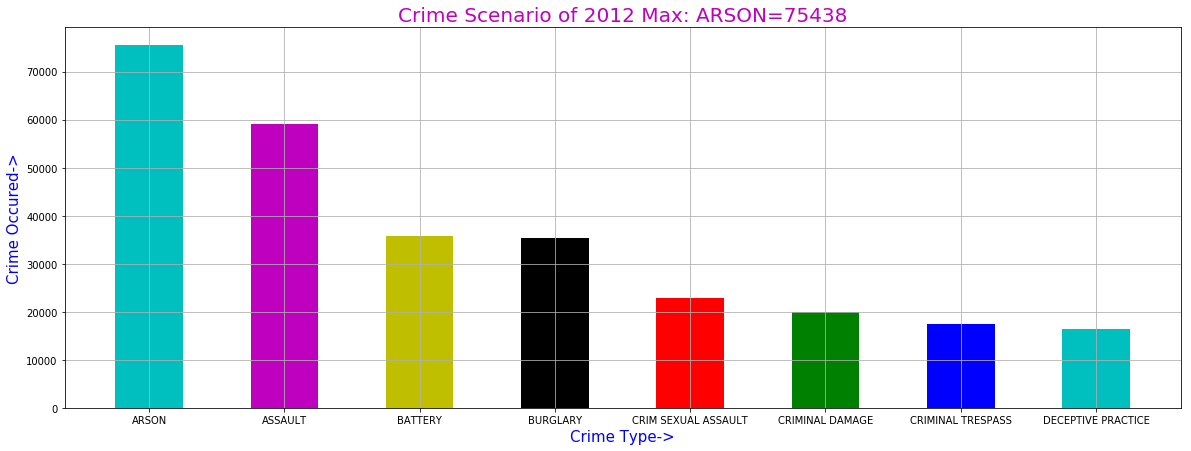

In [31]:
c12=c1217smooth[c1217smooth['Year']==2012]
c12=c12[c12.columns.tolist()[1:]]
c12.head()
c12arr=np.array(c12['Primary Type'])
c12u=np.unique(c12arr)
c12key=np.unique(np.array(np.array(c12['Primary Type'])))
c12val=np.array(c12['Primary Type'].value_counts().values)
print(c12u[:8])
print(c12val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2012 Max: {}={}".format(c12u[:8][0],c12val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c12u[:8],c12val[:8],color=color,width=0.5)

### 2013

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[71493 53984 34128 30851 17965 17965 17881 13127]


<BarContainer object of 8 artists>

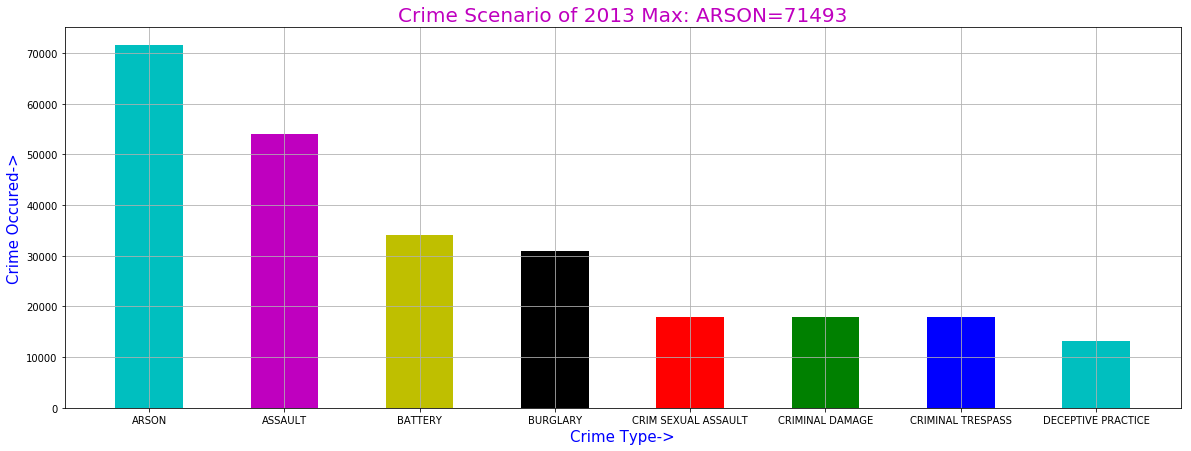

In [32]:
c13=c1217smooth[c1217smooth['Year']==2013]
c13=c13[c13.columns.tolist()[1:]]
c13.head()
c13arr=np.array(c13['Primary Type'])
c13u=np.unique(c13arr)
c13key=np.unique(np.array(np.array(c13['Primary Type'])))
c13val=np.array(c13['Primary Type'].value_counts().values)
print(c13u[:8])
print(c13val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2013 Max: {}={}".format(c13u[:8][0],c13val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c13u[:8],c13val[:8],color=color,width=0.5)

### 2014

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[61466 49393 28909 27783 16930 16884 14905 14541]


<BarContainer object of 8 artists>

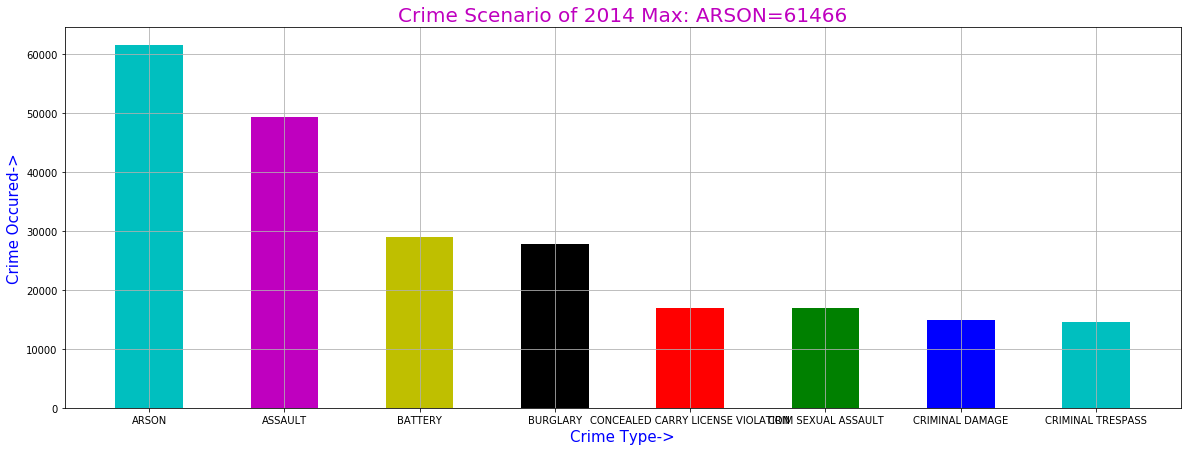

In [33]:
c14=c1217smooth[c1217smooth['Year']==2014]
c14=c14[c14.columns.tolist()[1:]]
c14.head()
c14arr=np.array(c14['Primary Type'])
c14u=np.unique(c14arr)
c14key=np.unique(np.array(np.array(c14['Primary Type'])))
c14val=np.array(c14['Primary Type'].value_counts().values)
print(c14u[:8])
print(c14val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2014 Max: {}={}".format(c14u[:8][0],c14val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c14u[:8],c14val[:8],color=color,width=0.5)

### 2015

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[22815 21252 11569 11060  7701  7376  5993  4923]


<BarContainer object of 8 artists>

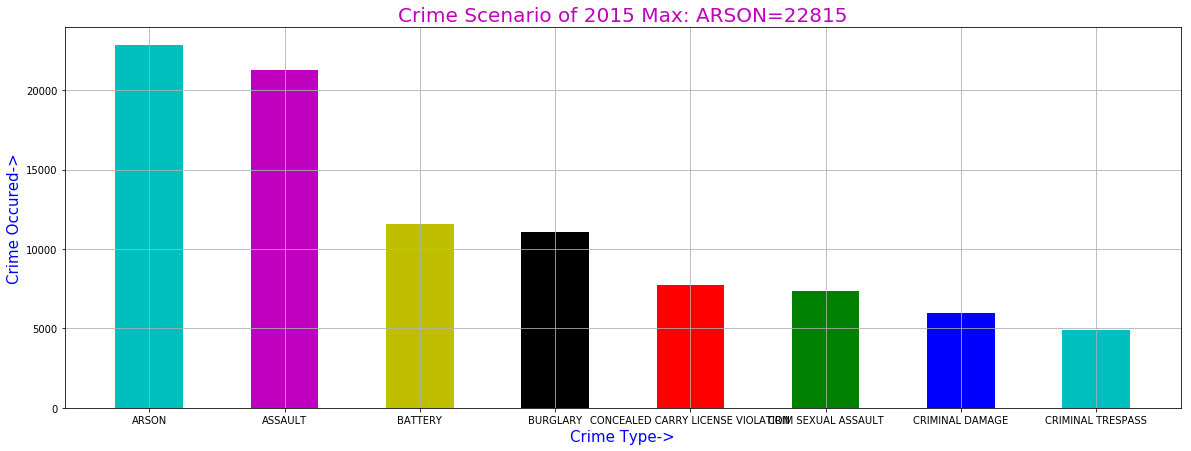

In [34]:
c15=c1217smooth[c1217smooth['Year']==2015]
c15=c15[c15.columns.tolist()[1:]]
c15.head()
c15arr=np.array(c15['Primary Type'])
c15u=np.unique(c15arr)
c15key=np.unique(np.array(np.array(c15['Primary Type'])))
c15val=np.array(c15['Primary Type'].value_counts().values)
print(c15u[:8])
print(c15val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2015 Max: {}={}".format(c15u[:8][0],c15val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c15u[:8],c15val[:8],color=color,width=0.5)

### 2016

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[5512 5071 2976 1928 1643 1469 1305 1277]


<BarContainer object of 8 artists>

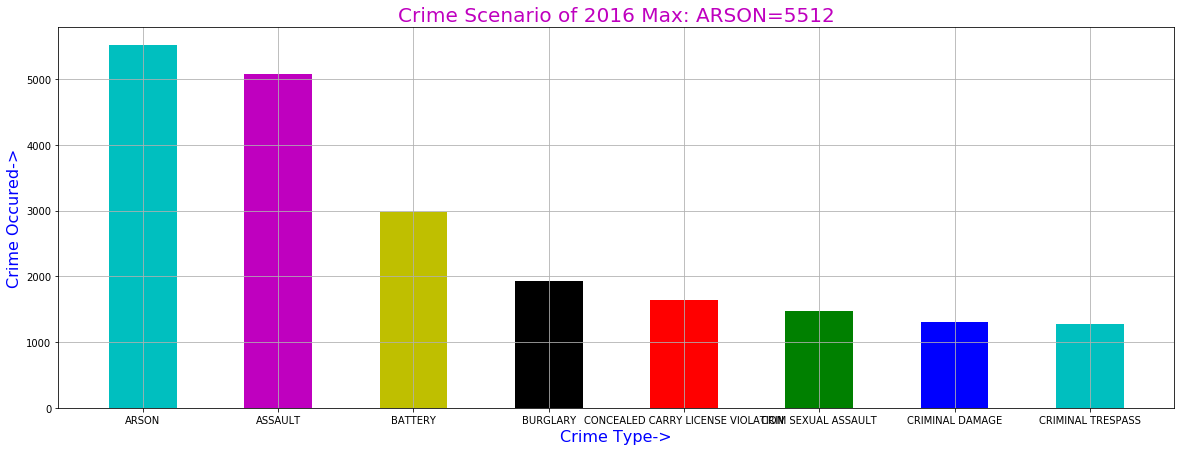

In [35]:
c16=c1217smooth[c1217smooth['Year']==2016]
c16=c16[c16.columns.tolist()[1:]]
c16.head()
c16arr=np.array(c16['Primary Type'])
c16u=np.unique(c16arr)
c16key=np.unique(np.array(np.array(c16['Primary Type'])))
c16val=np.array(c16['Primary Type'].value_counts().values)
print(c16u[:8])
print(c16val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2016 Max: {}={}".format(c16u[:8][0],c16val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=16,color='b')
plt.ylabel("Crime Occured->",fontsize=16,color='b')
plt.grid()
plt.bar(c16u[:8],c16val[:8],color=color,width=0.5)

### 2017

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[17234 12091  7233  5037  4683  4027  3448  3414]


<BarContainer object of 31 artists>

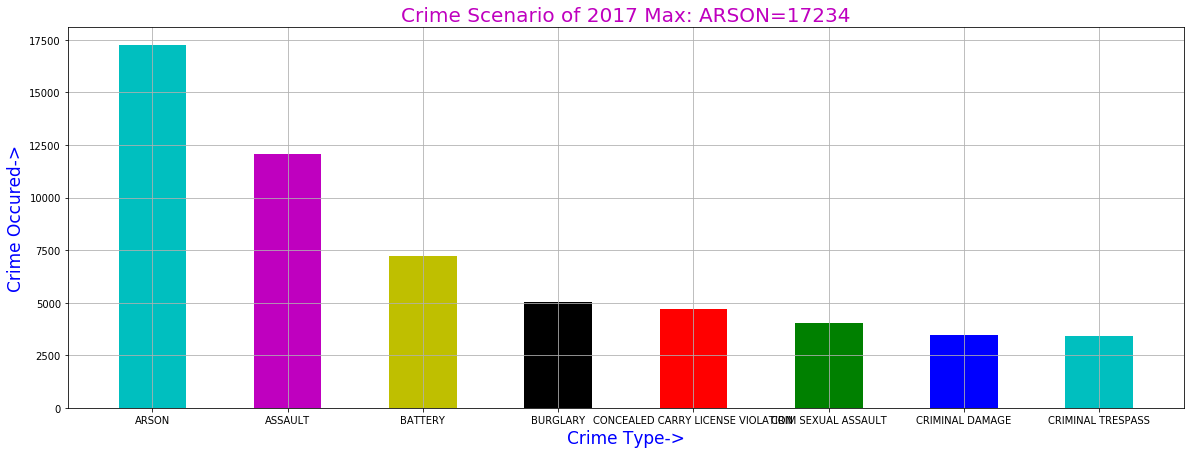

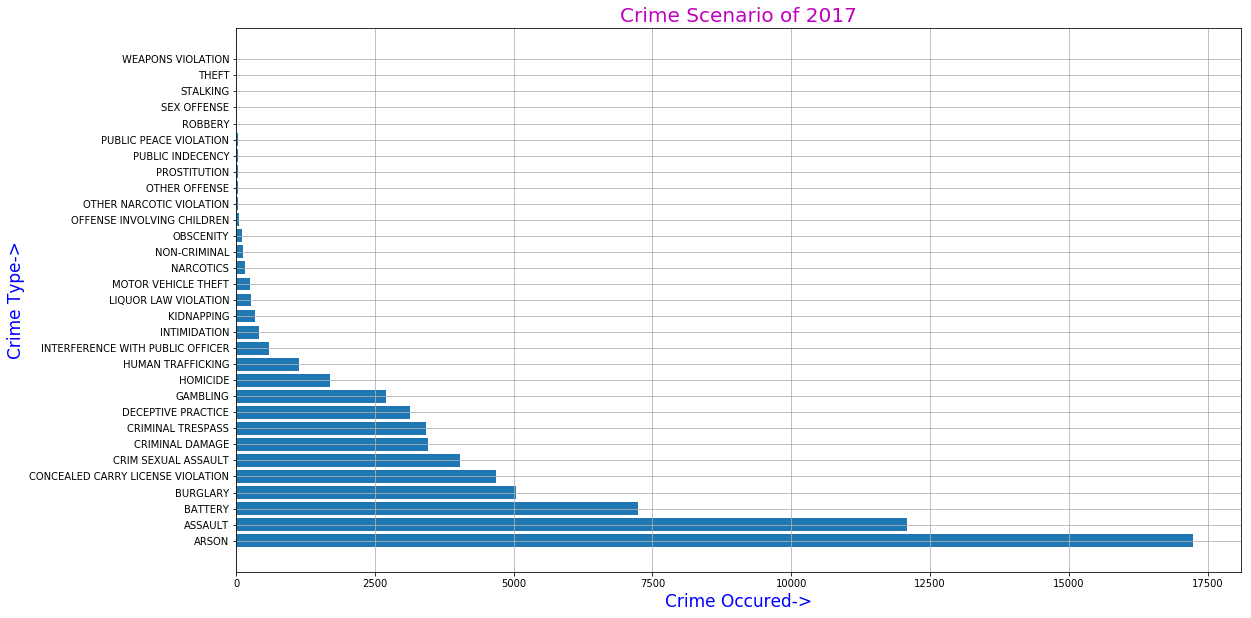

In [36]:
c17=c1719[c1719['Year']==2017]
c17=c17[c17.columns.tolist()[1:]]
c17.head()
c17arr=np.array(c17['Primary Type'])
c17u=np.unique(c17arr)
c17key=np.unique(np.array(np.array(c17['Primary Type'])))
c17val=np.array(c17['Primary Type'].value_counts().values)
print(c17u[:8])
print(c17val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2017 Max: {}={}".format(c17u[:8][0],c17val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=17,color='b')
plt.ylabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.bar(c17u[:8],c17val[:8],color=color,width=0.5)
plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2017",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c17u,c17val)
#c17.groupby('Primary Type')['Arrest'].count()



### 2018

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[65120 49790 27810 20384 18864 17152 13151 11733]


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
83768,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2211,...,-87.696064,"(41.689078832, -87.696064026)",33.0,"4,447",73.0,256.0,42.0,33.0,9.0,254.0
83769,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,734,...,-87.657709,"(41.763181359, -87.657709477)",17.0,"22,257",65.0,408.0,32.0,23.0,17.0,216.0
83770,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,613,...,-87.647391,"(41.740520866, -87.647390719)",18.0,"21,554",70.0,530.0,13.0,59.0,20.0,233.0
83771,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,1233,...,-87.657625,"(41.857068095, -87.657625201)",8.0,"14,920",33.0,365.0,26.0,43.0,15.0,150.0
83772,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,621,...,-87.647717,"(41.75191443, -87.647716532)",17.0,"21,554",70.0,487.0,31.0,59.0,20.0,229.0


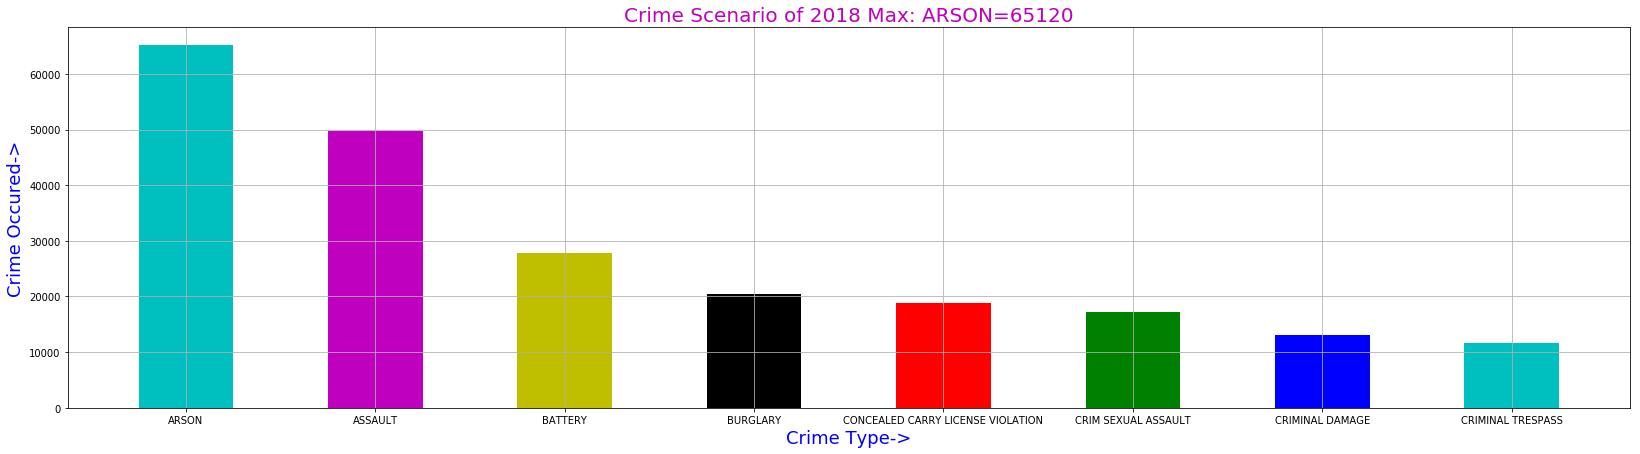

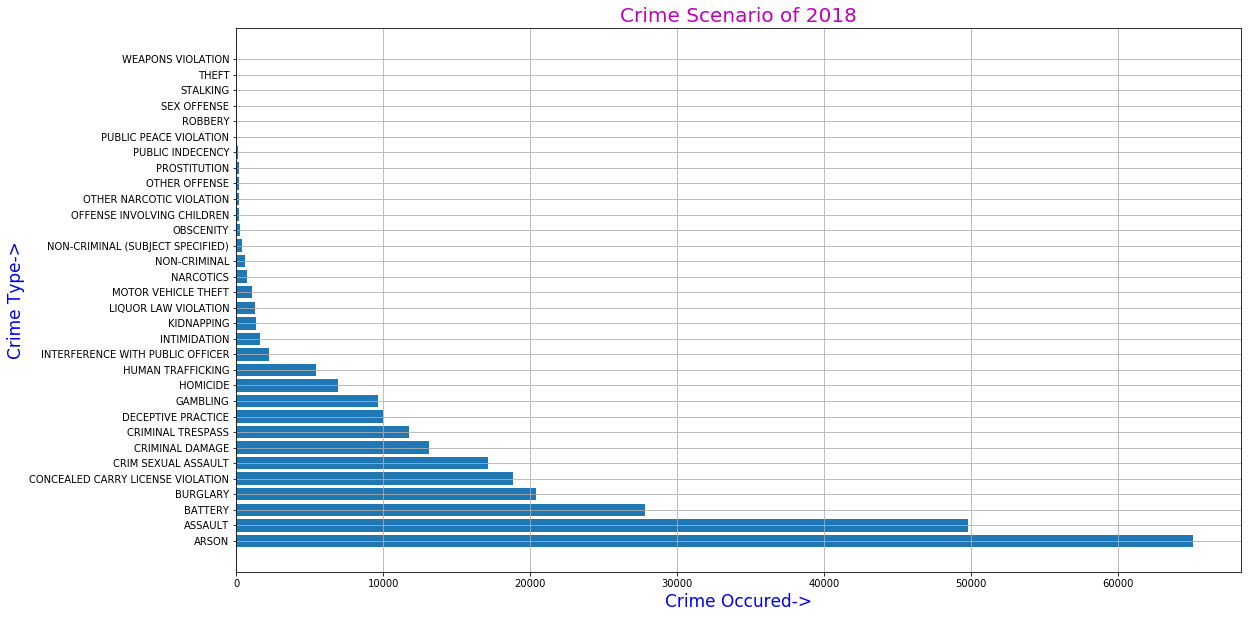

In [37]:
c18=c1719[c1719['Year']==2018]
c18=c18[c18.columns.tolist()[1:]]
c18.head()
c18arr=np.array(c18['Primary Type'])
c18u=np.unique(c18arr)
c18key=np.unique(np.array(np.array(c18['Primary Type'])))
c18val=np.array(c18['Primary Type'].value_counts().values)
print(c18u[:8])
print(c18val[:8])
color='cmykrgb'
plt.figure(figsize=(28,7))
plt.title("Crime Scenario of 2018 Max: {}={}".format(c18u[:8][0],c18val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=18,color='b')
plt.ylabel("Crime Occured->",fontsize=18,color='b')
plt.grid()
plt.bar(c18u[:8],c18val[:8],color=color,width=0.5)

plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2018",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c18u,c18val)
c18.head()

### 2019 

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[19242 16158  8467  6819  6017  5651  4974  3034]


<BarContainer object of 31 artists>

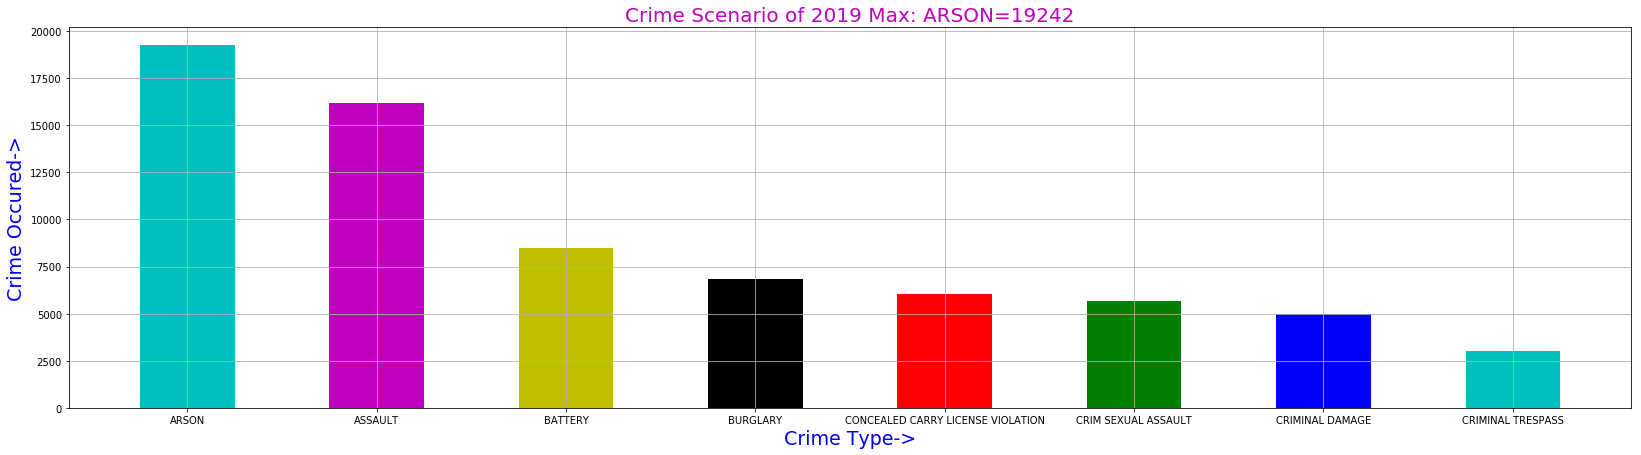

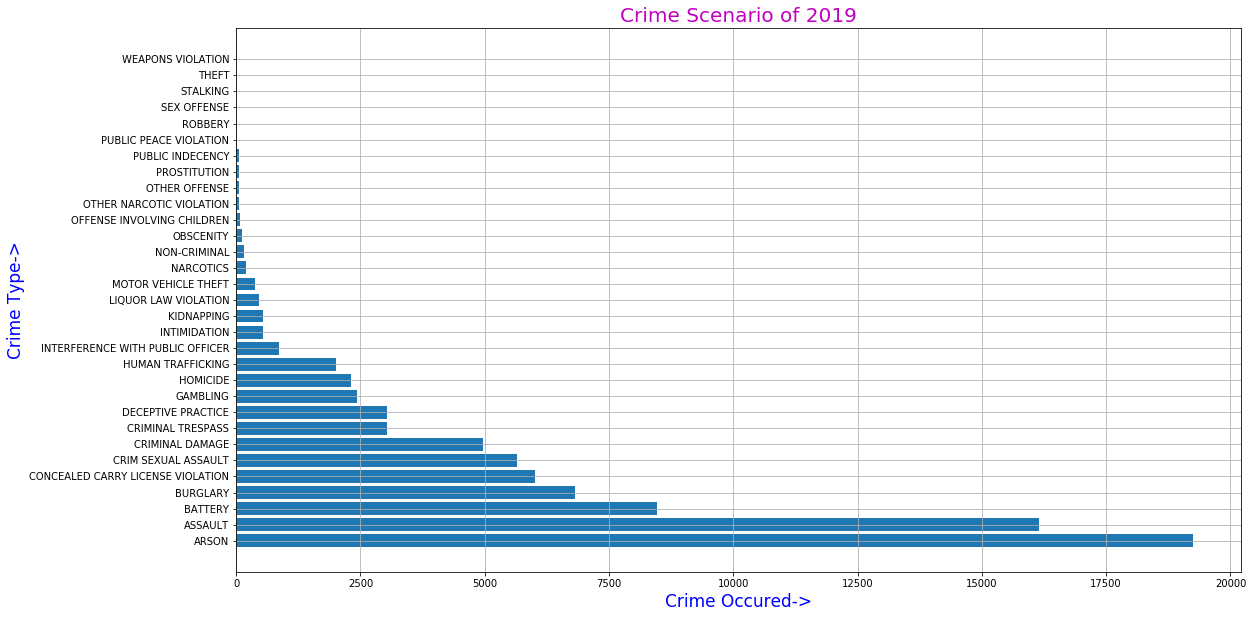

In [38]:
c19=c1719[c1719['Year']==2019]
c19=c19[c19.columns.tolist()[1:]]
c19.head()
c19arr=np.array(c19['Primary Type'])
c19u=np.unique(c19arr)
c19key=np.unique(np.array(np.array(c19['Primary Type'])))
c19val=np.array(c19['Primary Type'].value_counts().values)
print(c19u[:8])
print(c19val[:8])
color='cmykrgb'
plt.figure(figsize=(28,7))
plt.title("Crime Scenario of 2019 Max: {}={}".format(c19u[:8][0],c19val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=19,color='b')
plt.ylabel("Crime Occured->",fontsize=19,color='b')
plt.grid()
plt.bar(c19u[:8],c19val[:8],color=color,width=0.5)

plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2019",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c19u,c19val)

In [39]:
crmyr=['2019','2018','2017','2016','2015','2014','2013','2012']
crm=[c19val[:8][0],c18val[:8][0],c17val[:8][0],c16val[:8][0],c15val[:8][0],c14val[:8][0],c13val[:8][0],c12val[:8][0]]

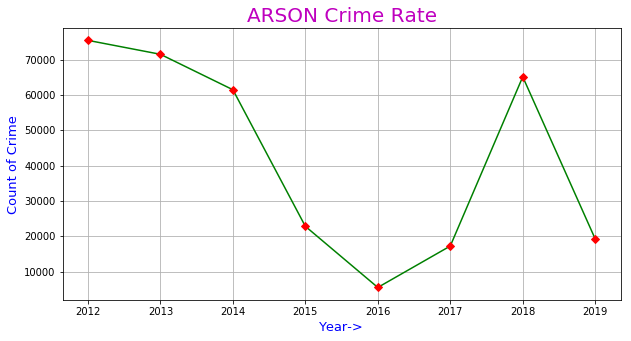

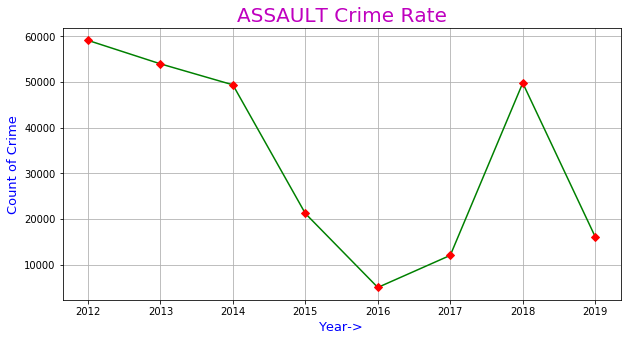

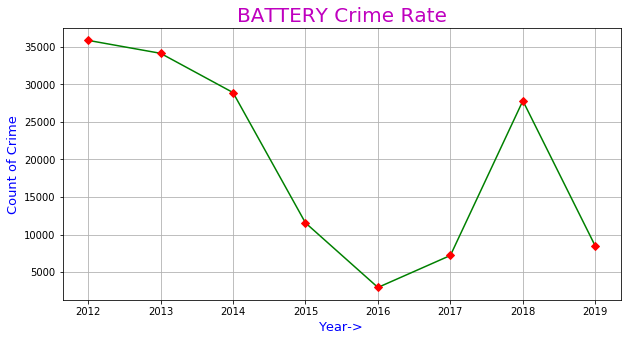

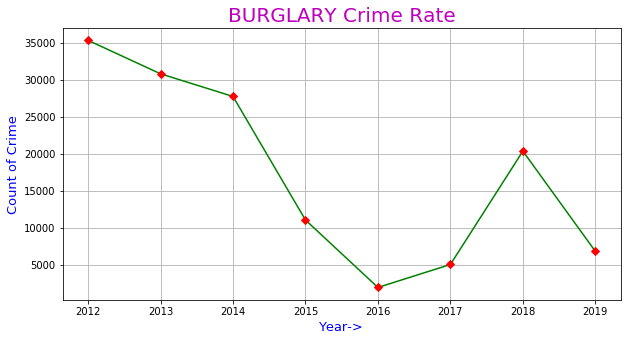

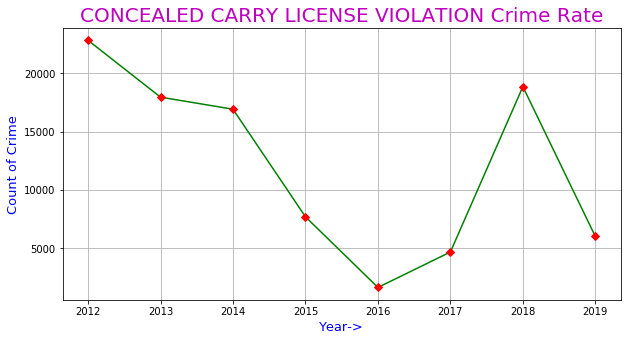

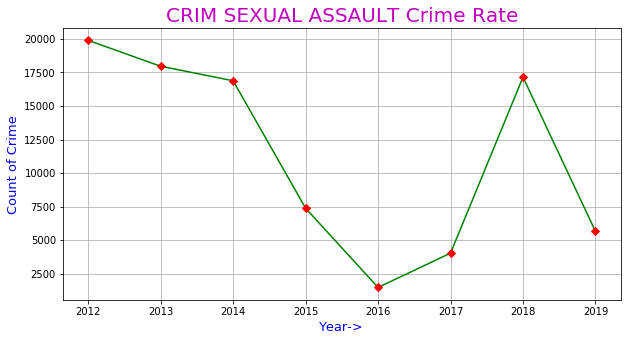

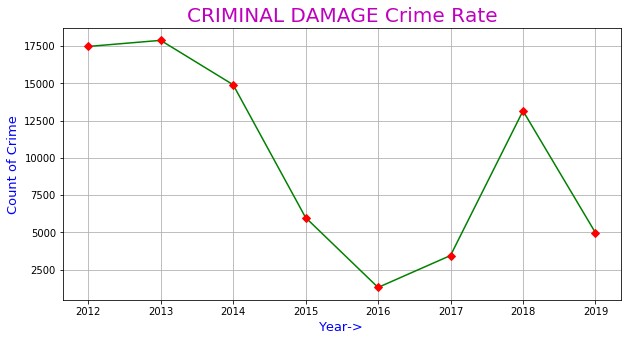

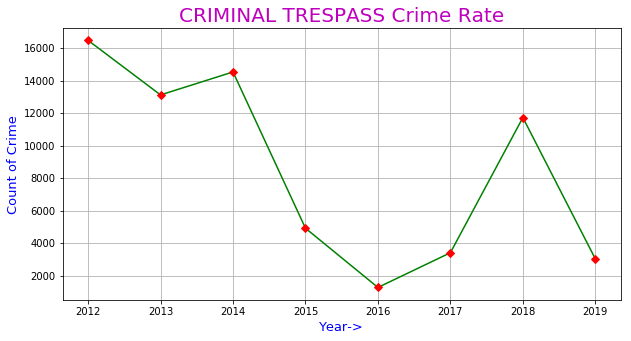

In [40]:
for i in range(len(c19u[:8])):
    plt.figure(figsize=(10,5))
    crmyr=['2019','2018','2017','2016','2015','2014','2013','2012']
    crm=[c19val[:8][i],c18val[:8][i],c17val[:8][i],c16val[:8][i],c15val[:8][i],c14val[:8][i],c13val[:8][i],c12val[:8][i]]
    plt.title("{} Crime Rate".format(c19u[:8][i]),fontsize=20,color="m")
    plt.xlabel("Year->",fontsize=13,color="b")
    plt.ylabel("Count of Crime",fontsize=13,color="b")
    plt.grid()
    plt.plot(crmyr[::-1],crm[::-1],"g")
    plt.plot(crmyr[::-1],crm[::-1],"Dr")
    plt.savefig("D:/ml python/crimes-in-chicago/Fig1/"+c19u[:8][i]+"_graph")

## Comparative analysis of 19 years

#### Arrest

In [41]:
c0104arst=np.array(c0104['Arrest'])
c0104arstu=np.unique(c0104arst)
print(c0104arstu)
c0104arst=c0104arst.tolist()
#print(c19arst)
cntt0104=c0104arst.count(c0104arstu[0])
cntf0104=c0104arst.count(c0104arstu[1])
cnt0104=[cntt0104,cntf0104]
print(cnt0104)

[False  True]
[740798, 307777]


In [42]:
arrst=[]
arrstratf=[]
arrstratt=[]

#### Arrest in 2001

In [43]:
c01arrststs=c01.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c01arrstcnt=c01.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c01arrststs)
print(c01arrstcnt)

[False, True]
[343103, 141843]


In [44]:
arrst.append(c01arrstcnt[0])
arrstratf.append((c01arrstcnt[0]/sum(c01arrstcnt))*100)
arrstratt.append((c01arrstcnt[1]/sum(c01arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103]
[70.75076400258999]
[29.249235997410022]


#### Arrest in 2002

In [45]:
c02arrststs=c02.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c02arrstcnt=c02.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c02arrststs)
print(c02arrstcnt)

[False, True]
[343117, 141126]


In [46]:
arrst.append(c02arrstcnt[0])
arrstratf.append((c02arrstcnt[0]/sum(c02arrstcnt))*100)
arrstratt.append((c02arrstcnt[1]/sum(c02arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117]
[70.75076400258999, 70.85636756752291]
[29.249235997410022, 29.143632432477084]


#### Arrest in 2003

In [47]:
c03arrststs=c03.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c03arrstcnt=c03.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c03arrststs)
print(c03arrstcnt)

[False, True]
[53455, 24559]


In [48]:
arrst.append(c03arrstcnt[0])
arrstratf.append((c03arrstcnt[0]/sum(c03arrstcnt))*100)
arrstratt.append((c03arrstcnt[1]/sum(c03arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455]
[70.75076400258999, 70.85636756752291, 68.51975286487041]
[29.249235997410022, 29.143632432477084, 31.48024713512959]


#### Arrest in 2004

In [49]:
c04arrststs=c04.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c04arrstcnt=c04.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c04arrststs)
print(c04arrstcnt)

[False, True]
[1122, 249]


In [50]:
arrst.append(c04arrstcnt[0])
arrstratf.append((c04arrstcnt[0]/sum(c04arrstcnt))*100)
arrstratt.append((c04arrstcnt[1]/sum(c04arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546]


#### Arrest in 2005

In [51]:
c05arrststs=c05.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c05arrstcnt=c05.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c05arrststs)
print(c05arrstcnt)

[False, True]
[3737, 538]


In [52]:
arrst.append(c05arrstcnt[0])
arrstratf.append((c05arrstcnt[0]/sum(c05arrstcnt))*100)
arrstratt.append((c05arrstcnt[1]/sum(c05arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426]


#### Arrest in 2006

In [53]:
c06arrststs=c06.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c06arrstcnt=c06.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c06arrststs)
print(c06arrstcnt)

[False, True]
[476390, 216765]


In [54]:
arrst.append(c06arrstcnt[0])
arrstratf.append((c06arrstcnt[0]/sum(c06arrstcnt))*100)
arrstratt.append((c06arrstcnt[1]/sum(c06arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647]


#### Arrest in 2007

In [55]:
c07arrststs=c07.groupby(['Arrest']).count()['Case Number'].keys().tolist()
c07arrstcnt=c07.groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c07arrststs)
print(c07arrstcnt)

[False, True]
[239864, 111280]


In [56]:
arrst.append(c07arrstcnt[0])
arrstratf.append((c07arrstcnt[0]/sum(c07arrstcnt))*100)
arrstratt.append((c07arrstcnt[1]/sum(c07arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718]


#### Arrest in 2008

In [57]:
c08.columns.tolist()

['Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Arrest',
 'Domestic',
 'Beat',
 'FBI Code',
 'Year',
 'Updated On']

In [58]:
c08arrststs=c0811[c0811['Year']==2008].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c08arrstcnt=c0811[c0811['Year']==2008].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c08arrststs)
print(c08arrstcnt)

[False, True]
[316684, 109705]


In [59]:
arrst.append(c08arrstcnt[0])
arrstratf.append((c08arrstcnt[0]/sum(c08arrstcnt))*100)
arrstratt.append((c08arrstcnt[1]/sum(c08arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257]


#### Arrest in 2009

In [60]:
c09arrststs=c0811[c0811['Year']==2009].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c09arrstcnt=c0811[c0811['Year']==2009].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c09arrststs)
print(c09arrstcnt)

[False, True]
[281168, 110427]


In [61]:
arrst.append(c09arrstcnt[0])
arrstratf.append((c09arrstcnt[0]/sum(c09arrstcnt))*100)
arrstratt.append((c09arrstcnt[1]/sum(c09arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474]


#### Arrest in 2010

In [62]:
c10arrststs=c0811[c0811['Year']==2010].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c10arrstcnt=c0811[c0811['Year']==2010].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c10arrststs)
print(c10arrstcnt)

[False, True]
[165528, 64525]


In [63]:
arrst.append(c10arrstcnt[0])
arrstratf.append((c10arrstcnt[0]/sum(c10arrstcnt))*100)
arrstratt.append((c10arrstcnt[1]/sum(c10arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924]


#### Arrest in 2011

In [64]:
c11arrststs=c0811[c0811['Year']==2011].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c11arrstcnt=c0811[c0811['Year']==2011].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c11arrststs)
print(c11arrstcnt)

[False, True]
[469, 66]


In [65]:
arrst.append(c11arrstcnt[0])
arrstratf.append((c11arrstcnt[0]/sum(c11arrstcnt))*100)
arrstratt.append((c11arrstcnt[1]/sum(c11arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084]


#### Arrest in 2012

In [66]:
c12arrststs=c1217[c1217['Year']==2012].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c12arrstcnt=c1217[c1217['Year']==2012].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c12arrststs)
print(c12arrstcnt)

[False, True]
[244547, 90168]


In [67]:
arrst.append(c12arrstcnt[0])
arrstratf.append((c12arrstcnt[0]/sum(c12arrstcnt))*100)
arrstratt.append((c12arrstcnt[1]/sum(c12arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698]


#### Arrest in 2013

In [68]:
c13arrststs=c1217[c1217['Year']==2013].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c13arrstcnt=c1217[c1217['Year']==2013].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c13arrststs)
print(c13arrstcnt)

[False, True]
[219764, 85974]


In [69]:
arrst.append(c13arrstcnt[0])
arrstratf.append((c13arrstcnt[0]/sum(c13arrstcnt))*100)
arrstratt.append((c13arrstcnt[1]/sum(c13arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887]


#### Arrest in 2014

In [70]:
c14arrststs=c1217[c1217['Year']==2014].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c14arrstcnt=c1217[c1217['Year']==2014].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c14arrststs)
print(c14arrstcnt)

[False, True]
[194532, 78690]


In [71]:
arrst.append(c14arrstcnt[0])
arrstratf.append((c14arrstcnt[0]/sum(c14arrstcnt))*100)
arrstratt.append((c14arrstcnt[1]/sum(c14arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614]


#### Arrest in 2015

In [72]:
c15arrststs=c1217[c1217['Year']==2015].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c15arrstcnt=c1217[c1217['Year']==2015].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c15arrststs)
print(c15arrstcnt)

[False, True]
[77877, 31808]


In [73]:
arrst.append(c15arrstcnt[0])
arrstratf.append((c15arrstcnt[0]/sum(c15arrstcnt))*100)
arrstratt.append((c15arrstcnt[1]/sum(c15arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718]


#### Arrest in 2016

In [74]:
c16arrststs=c1217[c1217['Year']==2016].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c16arrstcnt=c1217[c1217['Year']==2016].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c16arrststs)
print(c16arrstcnt)

[False, True]
[19926, 5289]


In [75]:
arrst.append(c16arrstcnt[0])
arrstratf.append((c16arrstcnt[0]/sum(c16arrstcnt))*100)
arrstratt.append((c16arrstcnt[1]/sum(c16arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562]


#### Arrest in 2017

In [76]:
c17arrststs=c1719[c1719['Year']==2017].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c17arrstcnt=c1719[c1719['Year']==2017].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c17arrststs)
print(c17arrstcnt)

[False, True]
[55807, 12461]


In [77]:
arrst.append(c17arrstcnt[0])
arrstratf.append((c17arrstcnt[0]/sum(c17arrstcnt))*100)
arrstratt.append((c17arrstcnt[1]/sum(c17arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926, 55807]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245, 81.74693853635672]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562, 18.253061463643288]


#### Arrest in 2018

In [78]:
c18arrststs=c1719[c1719['Year']==2018].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c18arrstcnt=c1719[c1719['Year']==2018].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c18arrststs)
print(c18arrstcnt)

[False, True]
[213799, 52880]


In [79]:
arrst.append(c18arrstcnt[0])
arrstratf.append((c18arrstcnt[0]/sum(c18arrstcnt))*100)
arrstratt.append((c18arrstcnt[1]/sum(c18arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926, 55807, 213799]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245, 81.74693853635672, 80.17091709508435]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562, 18.253061463643288, 19.829082904915648]


#### Arrest in 2019

In [80]:
c19arrststs=c1719[c1719['Year']==2019].groupby(['Arrest']).count()['Case Number'].keys().tolist()
c19arrstcnt=c1719[c1719['Year']==2019].groupby(['Arrest']).count()['Case Number'].values.tolist()
print(c19arrststs)
print(c19arrstcnt)

[False, True]
[65704, 18064]


In [81]:
arrst.append(c19arrstcnt[0])
arrstratf.append((c19arrstcnt[0]/sum(c19arrstcnt))*100)
arrstratt.append((c19arrstcnt[1]/sum(c19arrstcnt))*100)
print(arrst)
print(arrstratf)
print(arrstratt)

[343103, 343117, 53455, 1122, 3737, 476390, 239864, 316684, 281168, 165528, 469, 244547, 219764, 194532, 77877, 19926, 55807, 213799, 65704]
[70.75076400258999, 70.85636756752291, 68.51975286487041, 81.83807439824945, 87.41520467836257, 68.72777373026236, 68.30929761009729, 74.27114676973375, 71.80071247079253, 71.9521153821076, 87.66355140186916, 73.06126107285303, 71.87984483446611, 71.19924457034938, 71.00059260609929, 79.02439024390245, 81.74693853635672, 80.17091709508435, 78.43567949575016]
[29.249235997410022, 29.143632432477084, 31.48024713512959, 18.161925601750546, 12.584795321637426, 31.272226269737647, 31.690702389902718, 25.728853230266257, 28.199287529207474, 28.0478846178924, 12.33644859813084, 26.93873892714698, 28.120155165533887, 28.800755429650614, 28.999407393900718, 20.975609756097562, 18.253061463643288, 19.829082904915648, 21.56432050424983]


In [82]:
print(len(arrst))
print(len(arrstratf))
print(len(arrstratt))

19
19
19


In [83]:
yearlist=[str(i) for i in range(2001,2020)]
print(yearlist)

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


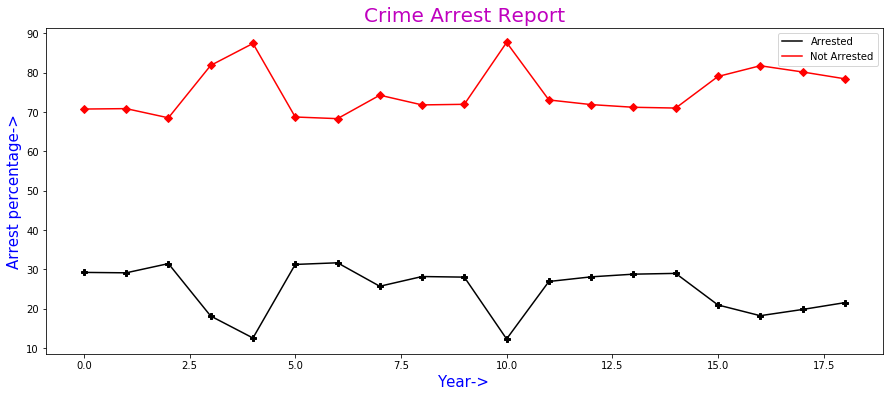

In [84]:
plt.figure(figsize=(15,6))
plt.title("Crime Arrest Report",fontsize=20,color='m')
plt.xlabel("Year->",fontsize=15,color='b')
plt.ylabel("Arrest percentage->",fontsize=15,color='b')
plt.plot(arrstratt,"k",label="Arrested")
plt.plot(arrstratt,"Pk")
plt.plot(arrstratf,"r",label="Not Arrested")
plt.plot(arrstratf,"Dr")
plt.legend(loc="upper right")

<BarContainer object of 19 artists>

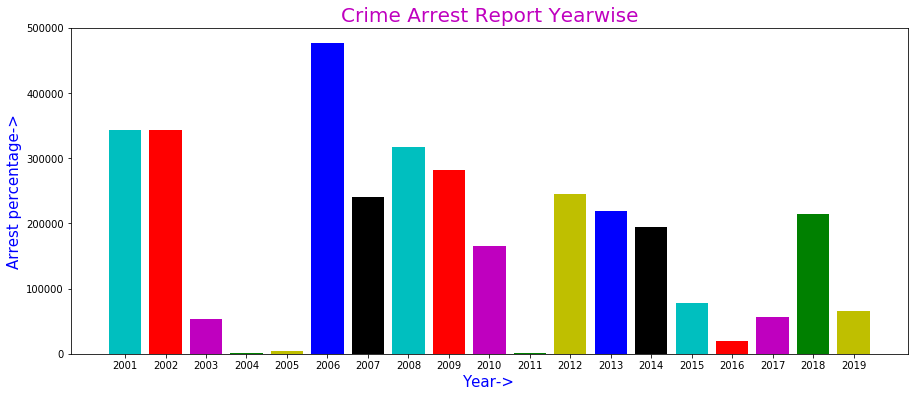

In [85]:
plt.figure(figsize=(15,6))
plt.title("Crime Arrest Report Yearwise",fontsize=20,color='m')
plt.xlabel("Year->",fontsize=15,color='b')
plt.ylabel("Arrest percentage->",fontsize=15,color='b')
plt.bar(yearlist,arrst,color="crmgybk")

In [86]:
arrsted=[c01arrstcnt[1],c02arrstcnt[1],c03arrstcnt[1],c04arrstcnt[1],c05arrstcnt[1],c06arrstcnt[1],c07arrstcnt[1],c08arrstcnt[1],c09arrstcnt[1],c10arrstcnt[1],c11arrstcnt[1],c12arrstcnt[1],c13arrstcnt[1],c14arrstcnt[1],c15arrstcnt[1],c16arrstcnt[1],c17arrstcnt[1],c18arrstcnt[1],c19arrstcnt[1]]
print(len(arrsted))

19


In [87]:
prob=[]
pres=arrstratt[0]
for i in range(len(arrstratt)):
    if pres>=arrstratt[i]:
        prob.append(0)
    else:
        prob.append(1)
    pres=arrstratt[i]
print(prob)

[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]


In [88]:
ratio=[]
for i in range(len(arrstratt)):
    ratio.append(arrsted[i]/(arrst[i]+arrsted[i]))
print(ratio)

[0.2924923599741002, 0.29143632432477085, 0.3148024713512959, 0.18161925601750548, 0.12584795321637426, 0.31272226269737646, 0.3169070238990272, 0.2572885323026626, 0.28199287529207473, 0.280478846178924, 0.1233644859813084, 0.26938738927146977, 0.2812015516553389, 0.28800755429650615, 0.28999407393900717, 0.2097560975609756, 0.1825306146364329, 0.1982908290491565, 0.21564320504249831]


In [89]:
regdata=pd.DataFrame({
    "Year":yearlist,
    "Case Booked":np.array(arrst)+np.array(arrsted),
    "Not Arrested":arrst,
    "Arrested":arrsted,
    "Arrested(%)":arrstratt,
    "Not Arrested(%)":arrstratf,
    "Efficiency Ratio":ratio,
    "Crime Hike":prob
})
link="D:/ml python/crimes-in-chicago/"
regdata.to_csv(link+"regdata.csv")

In [90]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(regdata[regdata.columns.tolist()[1:len(regdata.columns.tolist())-1]],regdata[regdata.columns.tolist()[-1]])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
regdata.columns.tolist()

['Year',
 'Case Booked',
 'Not Arrested',
 'Arrested',
 'Arrested(%)',
 'Not Arrested(%)',
 'Efficiency Ratio',
 'Crime Hike']

In [94]:
bookcase=int(input("Enter Probable Book Case number: "))
meanrat=np.mean(np.array(regdata['Efficiency Ratio']))
predict_crime=logmodel.predict([[bookcase,bookcase-bookcase*meanrat,bookcase*meanrat,bookcase*meanrat/bookcase,bookcase-(bookcase*meanrat/bookcase),meanrat]])
print(predict_crime[0])

Enter Probable Book Case number: 10
0


In [95]:
if predict_crime[0]==0:
    print("Crime in Chicago not will be Decreased...")
else:
    print("Crime in Chicago will be Increased...")

Crime in Chicago not will be Decreased...


In [96]:
regdata.head()

,Year,Case Booked,Not Arrested,Arrested,Arrested(%),Not Arrested(%),Efficiency Ratio,Crime Hike
0,2001,484946,343103,141843,29.249236,70.750764,0.292492,0
1,2002,484243,343117,141126,29.143632,70.856368,0.291436,0
2,2003,78014,53455,24559,31.480247,68.519753,0.314802,1
3,2004,1371,1122,249,18.161926,81.838074,0.181619,0
4,2005,4275,3737,538,12.584795,87.415205,0.125848,0


In [97]:
regdata.corr()

,Case Booked,Not Arrested,Arrested,Arrested(%),Not Arrested(%),Efficiency Ratio,Crime Hike
Case Booked,1.000000,0.998386,0.991255,0.682158,-0.682158,0.682158,0.248425
Not Arrested,0.998386,1.000000,0.982159,0.668414,-0.668414,0.668414,0.247542
Arrested,0.991255,0.982159,1.000000,0.705566,-0.705566,0.705566,0.247373
Arrested(%),0.682158,0.668414,0.705566,1.000000,-1.000000,1.000000,0.505209
Not Arrested(%),-0.682158,-0.668414,-0.705566,-1.000000,1.000000,-1.000000,-0.505209
Efficiency Ratio,0.682158,0.668414,0.705566,1.000000,-1.000000,1.000000,0.505209
Crime Hike,0.248425,0.247542,0.247373,0.505209,-0.505209,0.505209,1.000000


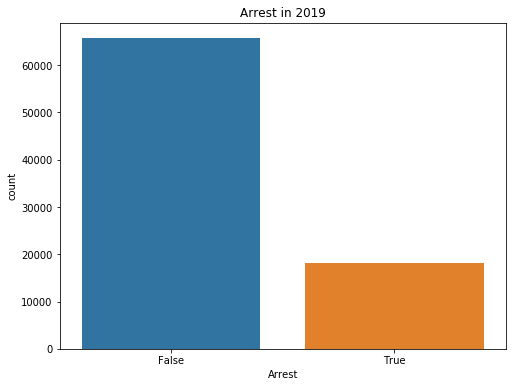

In [98]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2019")
sns.countplot(c19['Arrest'])

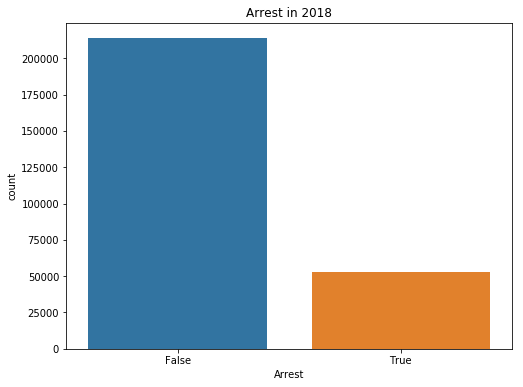

In [99]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2018")
sns.countplot(c18['Arrest'])

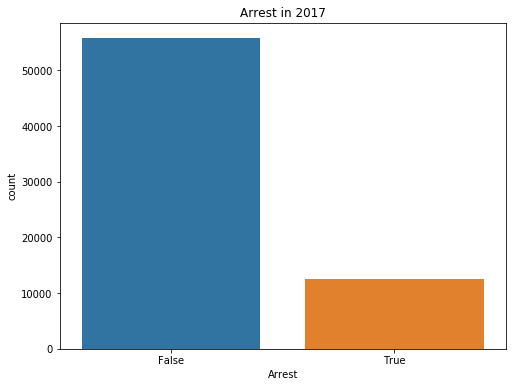

In [100]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2017")
sns.countplot(c17['Arrest'])

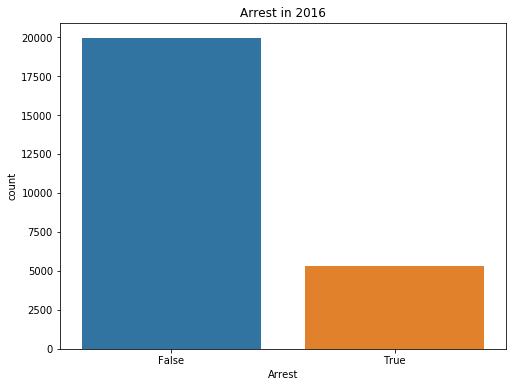

In [101]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2016")
sns.countplot(c16['Arrest'])

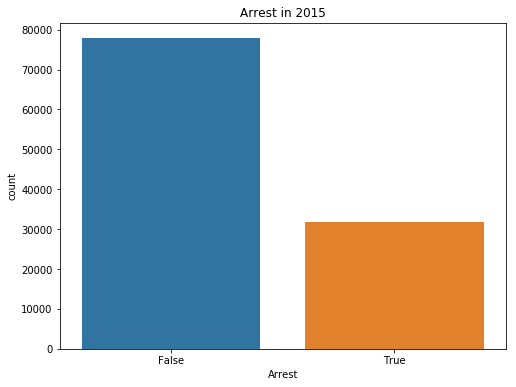

In [102]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2015")
sns.countplot(c15['Arrest'])

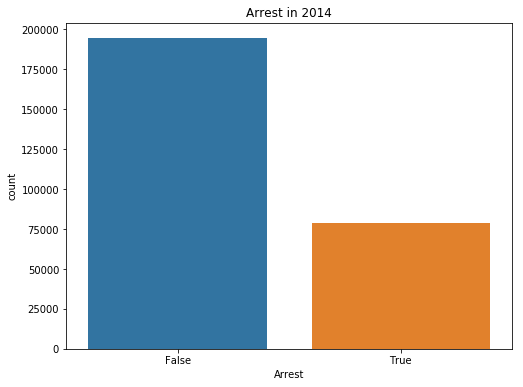

In [103]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2014")
sns.countplot(c14['Arrest'])

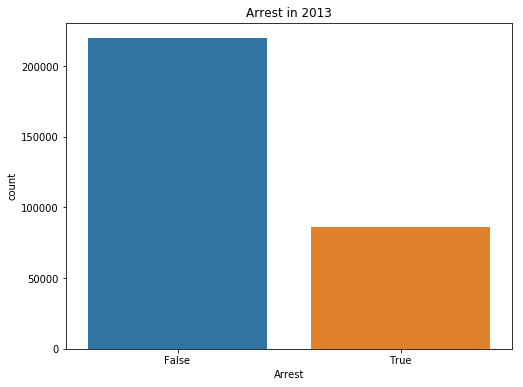

In [104]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2013")
sns.countplot(c13['Arrest'])

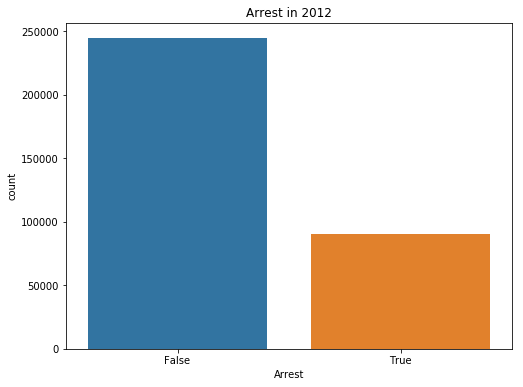

In [105]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2012")
sns.countplot(c12['Arrest'])

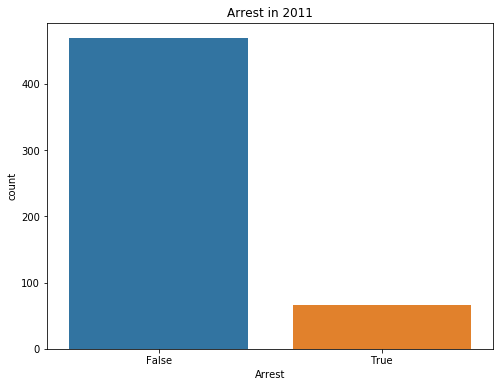

In [106]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2011")
sns.countplot(c11['Arrest'])

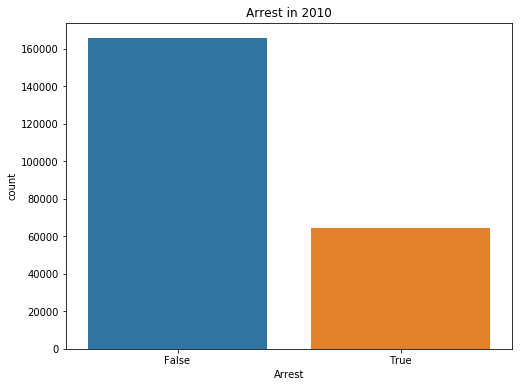

In [107]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2010")
sns.countplot(c10['Arrest'])

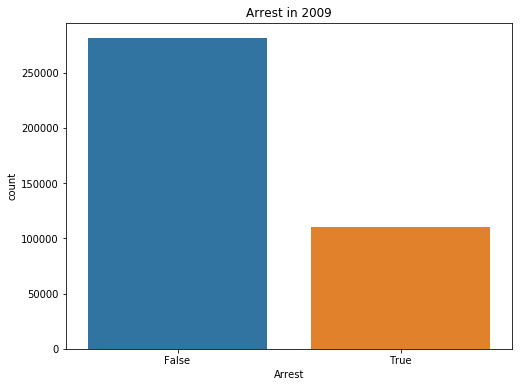

In [108]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2009")
sns.countplot(c09['Arrest'])

## Primary Type with Arrest

In [109]:
np.array(c19.groupby('Primary Type')['Arrest'].count())

array([  115,  6819, 16158,  3034,    61,   546,  8467,  2311,  5651,
          20,   149,     5,   459,    60,    64,    58,  3032,  4974,
           2,    16,   867,     1,  6017,   205,     1,   536,  2429,
         386,    79, 19242,  2004], dtype=int64)

In [110]:
np.array(c18.groupby('Primary Type')['Arrest'].count())

array([  373, 20384, 49790, 11733,   149,  1642, 27810,  6905, 18864,
         201,   588,    14,  1305,   169,   171,   268,  9979, 13151,
          36,     3,    87,  2233,     1, 17152,   718,    14,  1371,
        9683,  1107,   205, 65120,  5453], dtype=int64)

In [111]:
np.array(c17.groupby('Primary Type')['Arrest'].count())

array([  102,  4683, 12091,  3414,    22,   406,  7233,  1685,  5037,
          30,   151,     2,   246,    36,    44,    28,  3123,  2693,
          14,    34,   583,     5,  4027,   130,     3,   336,  3448,
         267,    29, 17234,  1132], dtype=int64)

In [112]:
np.array(c16.groupby('Primary Type')['Arrest'].count())

array([  55, 1928, 5071, 1277,    1,  136, 2976,  652, 1469,   22,   68,
          1,   86,   12,   19,   27,  936, 1305,    1,    2,    4,  220,
       1643,  101,    3,  169, 1069,   70,   12, 5512,  367], dtype=int64)

In [113]:
np.array(c15.groupby('Primary Type')['Arrest'].count())

array([  175,  7376, 21252,  4923,    14,   474, 11569,  2985,  5993,
         118,     4,     4,   585,    52,    79,   133,  4085, 11060,
           6,     2,    23,   923,     3,  7701,   745,     5,  1103,
        3584,   331,    71, 22815,  1492], dtype=int64)

In [114]:
np.array(c14.groupby('Primary Type')['Arrest'].count())

array([  396, 16884, 49393, 14541,    15,  1234, 27783,  7536, 14905,
         393,     2,     2,  1397,   116,   219,   395,  9895, 28909,
          10,    16,     1,    35,  2273,    10, 16930,  1623,    10,
        2899,  9786,   903,   139, 61466,  3106], dtype=int64)

In [115]:
np.array(c13.groupby('Primary Type')['Arrest'].count())

array([  364, 17965, 53984, 17881,  1224, 30851,  8135, 13127,   596,
           3,     1,  1281,   134,   242,   465, 12579, 34128,     3,
           4,    22,  2281,     5, 17965,  1652,    10,  3135, 11816,
         995,   153, 71493,  3244], dtype=int64)

In [116]:
np.array(c12.groupby('Primary Type')['Arrest'].count())

array([  469, 19896, 59125, 22836,  1381, 35852,  8215, 13203,   724,
           1,  1228,   156,   236,   573, 16486, 35379,     6,     2,
          26,  2155,     6, 17472,  2203,    17,  3007, 13482,  1031,
         207, 75438,  3903], dtype=int64)

In [117]:
np.array(c11.groupby('Primary Type')['Arrest'].count())

array([  2,  44,  85,   2,  17, 193,   1,   3,  24,  25,  11,   6,  12,
       108,   2], dtype=int64)

In [118]:
np.array(c10.groupby('Primary Type')['Arrest'].count())

array([  335, 13900, 42557, 15388,   770, 25688,  6076,  7341,   612,
         512,   138,   211,   509, 10848, 28111,     1,    19,  1491,
           5, 14062,  1589,     3,  2292,  8420,   599,   113, 46049,
        2415], dtype=int64)

In [119]:
np.array(c09.groupby('Primary Type')['Arrest'].count())

array([  615, 22834, 68369, 26720,  1381, 47663, 10834, 13648,   990,
         231,   572,   231,   293,   745, 15460, 43452,    21,  2523,
           7, 25569,  3939,    10,  3138, 15952,  1233,   167, 80843,
        4157], dtype=int64)

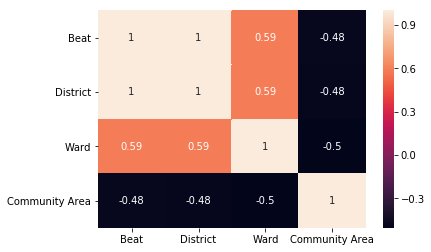

In [120]:
c19num=c19[['Beat','District','Ward','Community Area']]
sns.heatmap(c19num.corr(),annot=True)

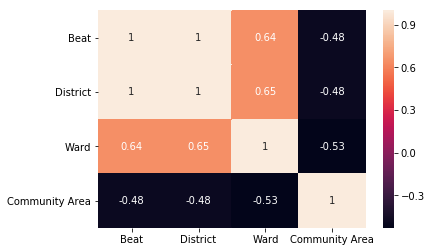

In [121]:
c18num=c18[['Beat','District','Ward','Community Area']]
sns.heatmap(c18num.corr(),annot=True)

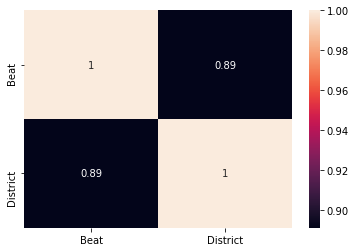

In [122]:
c01num=c01[['Beat','District']]
sns.heatmap(c01num.corr(),annot=True)

In [123]:
c19.corr().to_csv(link+"corr.csv")

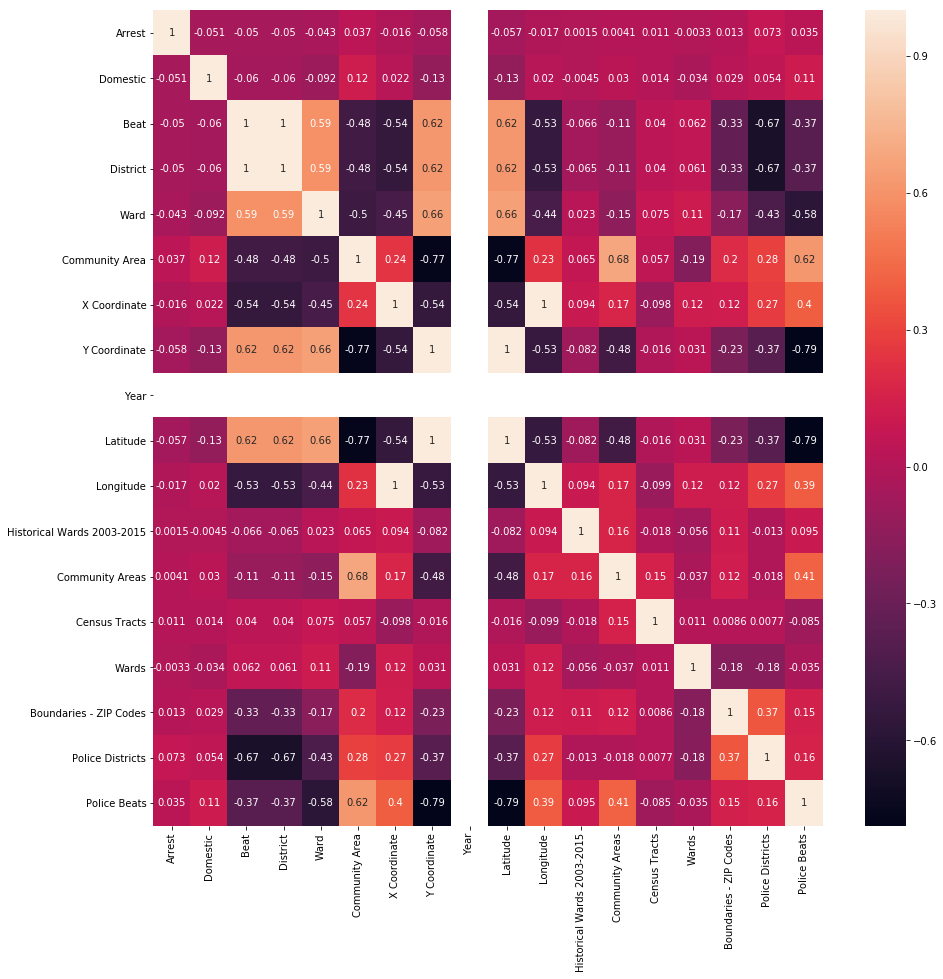

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(c19.corr(),annot=True)

In [125]:
c18.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
83768,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2211,...,-87.696064,"(41.689078832, -87.696064026)",33.0,"4,447",73.0,256.0,42.0,33.0,9.0,254.0
83769,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,734,...,-87.657709,"(41.763181359, -87.657709477)",17.0,"22,257",65.0,408.0,32.0,23.0,17.0,216.0
83770,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,613,...,-87.647391,"(41.740520866, -87.647390719)",18.0,"21,554",70.0,530.0,13.0,59.0,20.0,233.0
83771,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,1233,...,-87.657625,"(41.857068095, -87.657625201)",8.0,"14,920",33.0,365.0,26.0,43.0,15.0,150.0
83772,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,621,...,-87.647717,"(41.75191443, -87.647716532)",17.0,"21,554",70.0,487.0,31.0,59.0,20.0,229.0


In [126]:
c19['Latitude'].iloc[0]

41.68626189

In [127]:
import folium 
import folium.plugins as plugins
import branca

In [128]:
c18=c18.fillna(0)
print(c18)
print(c18['Latitude'].iloc[0])
locations = c18['Latitude'].iloc[0], c18['Longitude'].iloc[0]
print("Lat Mean: ",c18['Latitude'].iloc[0])
print("Long Mean: ",c18['Longitude'].iloc[0])
m = folium.Map(location=locations,zoom_start=7)
'''c18=c18.fillna(0,inplace=True)'''
print(type(c18))
def colsel(i):
    if c18['Arrest'].iloc[i] == 1:
        color = 'blue'
    elif c18['Arrest'].iloc[i] == 2:
        color = 'green'
    else:
        color = 'red'
    return color

for i in range(100):
    #m = folium.Map(location=location,zoom_start=12)
    #print(accupdate.iloc[i]['Latitude']," ", accupdate.iloc[i]['Longitude'])
    show="Accident Loc=> Lat:"+str(c18.iloc[i]['Latitude'])+" long:"+str(c18.iloc[i]['Longitude'])
    popup = folium.Popup(show, parse_html=True) 
    folium.Marker([c18.iloc[i]['Latitude'], c18.iloc[i]['Longitude']],popup=popup,
                  icon=folium.Icon(color=colsel(i))
                 ).add_to(m)
    #m.add_child(folium.Marker(locations,popup="Accident Loc=> Lat:"+str(accupdate.iloc[i]['Latitude'])+" long:"+str(accupdate.iloc[i]['Longitude']),icon=folium.Icon(color="blue", icon='info-sign')))
link="D:/ml python/crimes-in-chicago/"
m.save(link+'Accident_Severity2.html')
display(m)

       Case Number                    Date                      Block  IUCR  \
83768     JC104662  12/31/2018 11:59:00 PM     112XX S SACRAMENTO AVE  1320   
83769     JC110056  12/31/2018 11:59:00 PM            013XX W 72ND ST  1153   
83770     JC100043  12/31/2018 11:57:00 PM        084XX S SANGAMON ST  1310   
83771     JC100006  12/31/2018 11:56:00 PM         018XX S ALLPORT ST   440   
83772     JC100031  12/31/2018 11:55:00 PM        078XX S SANGAMON ST   486   
83773     JC100026  12/31/2018 11:49:00 PM         052XX W GLADYS AVE  041A   
83774     JC100011  12/31/2018 11:48:00 PM          079XX S LAFLIN ST   486   
83775     JC100089  12/31/2018 11:47:00 PM        018XX W BELMONT AVE   460   
83776     JC101652  12/31/2018 11:45:00 PM      032XX W EVERGREEN AVE  1310   
83777     JC101094  12/31/2018 11:45:00 PM      032XX N SHEFFIELD AVE   890   
83778     JB574407  12/31/2018 11:44:00 PM         047XX N RACINE AVE  1330   
83779     JC100036  12/31/2018 11:43:00 PM      071X